# Capstone 2 -- EDA
### Online Retail II

<a id= 'libraries'></a>
**Import Libraries** 

In [792]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

<a id='preferences'></a>
**Set Default Preferences**

In [794]:
# display all columns
pd.set_option('display.max_columns', None)

# surpress scientific notation
pd.options.display.float_format = '{:}'.format

<a id='data'></a>
**Import Data** 

In [796]:
# import

start = time.time()
file_path = '../Data/cleaned_data.csv'

data = pd.read_csv(file_path)
end = time.time()

print(f"Import time {round(end - start,3)} seconds")
data.head()

Import time 0.685 seconds


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [797]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

**Re-import with correct formats**

In [799]:
dtype_dict = {'Invoice':'string',
              'StockCode':'string',
              'Description':'string',
              'Quantity':'int32',
              'Price':'float32',
              'Customer ID':'string',
              'Country':'string',
              'Sales':'float32'}

#re-import with correct dtype
start = time.time()
file_path = '../Data/cleaned_data.csv'

data = pd.read_csv(file_path, dtype=dtype_dict, parse_dates=['InvoiceDate'])
end = time.time()

print(f"Import time {round(end - start,3)} seconds")
data.info()

Import time 0.865 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041669 entries, 0 to 1041668
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041669 non-null  string        
 1   StockCode    1041669 non-null  string        
 2   Description  1041669 non-null  string        
 3   Quantity     1041669 non-null  int32         
 4   InvoiceDate  1041669 non-null  datetime64[ns]
 5   Price        1041669 non-null  float32       
 6   Customer ID  805549 non-null   string        
 7   Country      1041669 non-null  string        
 8   Sales        1041669 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int32(1), string(5)
memory usage: 59.6 MB


**Copy data in case something goes wrong**

In [801]:
df=data.copy(deep=True)

In [802]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
725221,556080,84692,BOX OF 24 COCKTAIL PARASOLS,2,2011-06-08 15:21:00,1.6299999952316284,<NA>,United Kingdom,3.259999990463257
267053,516162,21098,CHRISTMAS TOILET ROLL,1,2010-07-18 12:07:00,1.25,14553.0,United Kingdom,1.25
905430,571565,21843,RED RETROSPOT CAKE STAND,2,2011-10-18 10:18:00,10.949999809265137,12720.0,Germany,21.899999618530273
249014,514198,82567,"AIRLINE LOUNGE,METAL SIGN",1,2010-06-30 15:55:00,4.210000038146973,<NA>,United Kingdom,4.210000038146973
992898,578116,22654,DELUXE SEWING KIT,3,2011-11-23 09:51:00,5.949999809265137,13078.0,United Kingdom,17.850000381469727
187673,507710,22045,SPACEBOY GIFT WRAP,25,2010-05-11 11:29:00,0.41999998688697815,13206.0,United Kingdom,10.5
220733,511442,22127,PARTY CONES CARNIVAL ASSORTED,12,2010-06-08 12:16:00,1.25,17190.0,United Kingdom,15.0
504921,537640,21864,UNION JACK FLAG PASSPORT COVER,10,2010-12-07 15:31:00,4.210000038146973,<NA>,United Kingdom,42.099998474121094
394393,528184,85049D,BRIGHT BLUES RIBBONS,12,2010-10-21 11:10:00,1.25,15358.0,United Kingdom,15.0
351005,524368,21415,CLAM SHELL SMALL,1,2010-09-28 17:18:00,4.210000038146973,<NA>,United Kingdom,4.210000038146973


## Inspect the Data  and Additional Cleaning

In [804]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041669 entries, 0 to 1041668
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041669 non-null  string        
 1   StockCode    1041669 non-null  string        
 2   Description  1041669 non-null  string        
 3   Quantity     1041669 non-null  int32         
 4   InvoiceDate  1041669 non-null  datetime64[ns]
 5   Price        1041669 non-null  float32       
 6   Customer ID  805549 non-null   string        
 7   Country      1041669 non-null  string        
 8   Sales        1041669 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int32(1), string(5)
memory usage: 59.6 MB


### Duplicates <a id='duplicates'></a>
* 33757 duplicated rows dropped

In [806]:
len(df)==len(df.drop_duplicates())

False

In [807]:
len(df[df.duplicated(keep='first')])  # 33757 duplicated rows

33757

In [808]:
df[df.duplicated(keep=False)].sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
521182,537216,22476,EMPIRE UNION JACK TV DINNER TRAY,4,2010-12-05 15:40:00,4.949999809265137,15502.0,United Kingdom,19.799999237060547
513504,536544,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,1,2010-12-01 14:32:00,5.059999942779541,<NA>,United Kingdom,5.059999942779541
463170,534185,21791,VINTAGE HEADS AND TAILS CARD GAME,1,2010-11-21 14:04:00,1.25,16726.0,United Kingdom,1.25
490252,536425,22644,CERAMIC CHERRY CAKE MONEY BANK,12,2010-12-01 12:08:00,1.4500000476837158,13758.0,United Kingdom,17.399999618530273
491072,536544,22203,MILK PAN RED RETROSPOT,1,2010-12-01 14:32:00,7.619999885559082,<NA>,United Kingdom,7.619999885559082


In [809]:
#sampling of duplicates to ensure complete duplication before dropping
#df[(df.Invoice=='489517')&(df.StockCode=='21913')]
#df[(df.Invoice=='581538')&(df.StockCode=='22694')]
df[(df.Invoice=='538155')&(df.StockCode=='21165')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
511282,538155,21165,BEWARE OF THE CAT METAL SIGN,1,2010-12-09 16:52:00,1.690000057220459,16907.0,United Kingdom,1.690000057220459
533298,538155,21165,BEWARE OF THE CAT METAL SIGN,1,2010-12-09 16:52:00,1.690000057220459,16907.0,United Kingdom,1.690000057220459


In [810]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [811]:
#ensure it kept only first occurance
df[(df.Invoice=='538155')&(df.StockCode=='21165')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
511282,538155,21165,BEWARE OF THE CAT METAL SIGN,1,2010-12-09 16:52:00,1.690000057220459,16907.0,United Kingdom,1.690000057220459


### Known Customers <a id='known'></a>
* The purpose of this porject is to identify customer segments.  to do that we have to focus on the known customers with Values in the 'Customer ID' column.
<br><br>
* Unknown customers represent approximately 7.8% of all invoices and 15.1% of sales

In [813]:
#create df for customers with and without 'Customer ID' 
no_id = df[df['Customer ID'].isna()==True].copy()
has_id = df[df['Customer ID'].isna()==False].copy()

In [814]:
# Percent of sales
no_id.Sales.sum()/df.Sales.sum()

0.15100734

In [815]:
# percent of invoices
no_id.Invoice.nunique()/df.Invoice.nunique()

0.07752769737498752

In [816]:
# known customer unique transcation
has_id.Invoice.nunique()

36969

Known customers had 36,969 transactions over the sales data

In [818]:
no_id.Description.value_counts().head(15)

Description
DOTCOM POSTAGE                        1399
JUMBO BAG RED RETROSPOT                671
JUMBO STORAGE BAG SUKI                 624
REGENCY CAKESTAND 3 TIER               615
PARTY BUNTING                          607
WHITE HANGING HEART T-LIGHT HOLDER     585
RECYCLING BAG RETROSPOT                561
JUMBO SHOPPER VINTAGE RED PAISLEY      518
WOODLAND CHARLOTTE BAG                 512
JUMBO BAG WOODLAND ANIMALS             503
RED TOADSTOOL LED NIGHT LIGHT          494
STRAWBERRY CERAMIC TRINKET BOX         493
SUKI  SHOULDER BAG                     469
CHARLOTTE BAG SUKI DESIGN              449
JUMBO  BAG BAROQUE BLACK WHITE         437
Name: count, dtype: Int64

In [819]:
has_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1041668
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  string        
 1   StockCode    779425 non-null  string        
 2   Description  779425 non-null  string        
 3   Quantity     779425 non-null  int32         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float32       
 6   Customer ID  779425 non-null  string        
 7   Country      779425 non-null  string        
 8   Sales        779425 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int32(1), string(5)
memory usage: 50.5 MB


## Summary Stats

In [821]:
#describe 
has_id.describe()

,Quantity,InvoiceDate,Price,Sales
count,779425.0,779425,779425.0,779425.0
mean,13.489369727683869,2011-01-03 01:44:42.593475584,3.2184879779815674,22.29182243347168
min,1.0,2009-12-01 07:45:00,0.0010000000474974513,0.0010000000474974513
25%,2.0,2010-07-02 14:39:00,1.25,4.949999809265137
50%,6.0,2010-12-02 14:09:00,1.9500000476837158,12.479999542236328
75%,12.0,2011-08-01 13:44:00,3.75,19.799999237060547
max,80995.0,2011-12-09 12:50:00,10953.5,168469.59375
std,145.85581409954753,NaN,29.624326705932617,227.24818420410156


In [822]:
has_id.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

In [823]:
has_id[['Invoice','Customer ID']].nunique()

Invoice        36969
Customer ID     5878
dtype: int64

#### Quantity
* There were 779425 individual line items in the dataset with 95% selling 36 or less in any given transaction.  
* There were only 9812 times when a single item sold more than 100 Quantiy in any given transaction.

In [825]:
has_id.Quantity.describe([.25, .5, .75, .95, .99])

count             779425.0
mean    13.489369727683869
std     145.85581409954753
min                    1.0
25%                    2.0
50%                    6.0
75%                   12.0
95%                   36.0
99%                  144.0
max                80995.0
Name: Quantity, dtype: float64

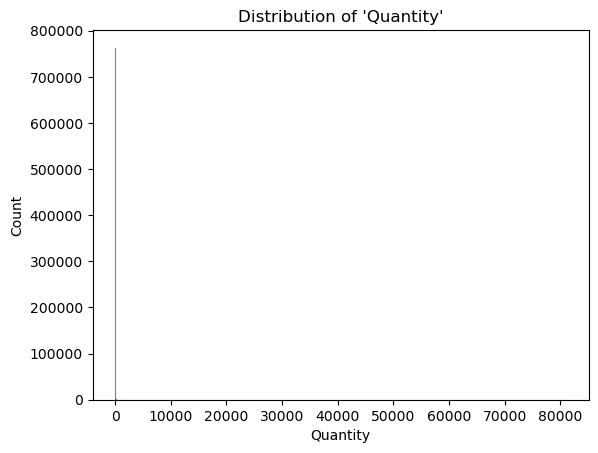

In [826]:
sns.histplot(has_id.Quantity, bins=int(np.sqrt(len(has_id))))
plt.title("Distribution of 'Quantity'")

plt.show()

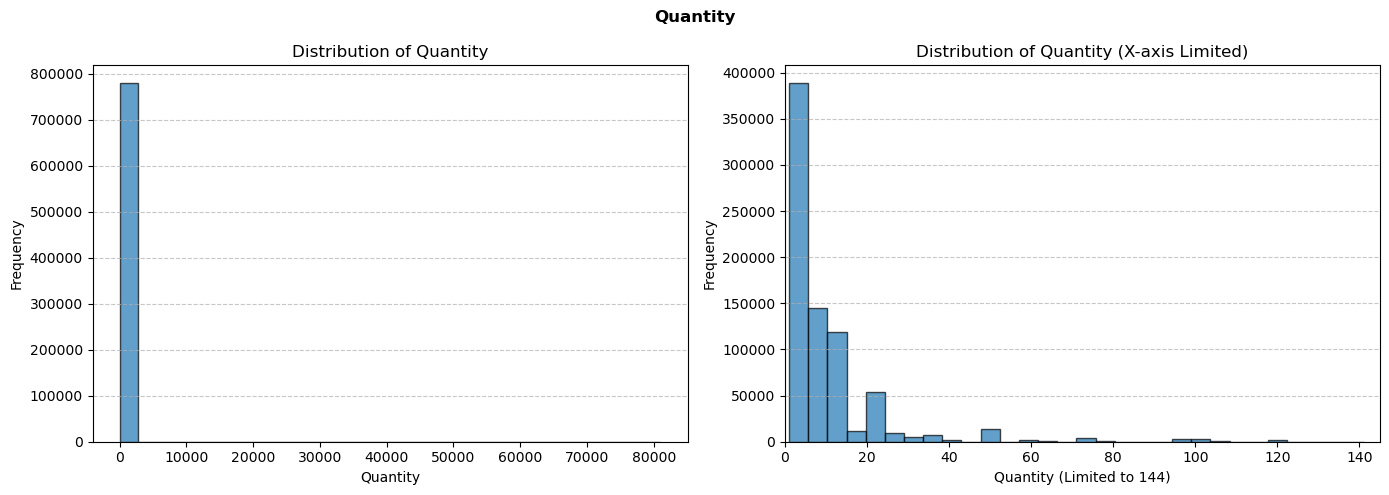

In [827]:

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Standard histogram
axes[0].hist(has_id['Quantity'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Quantity')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: Histogram with x-axis limited to 140
axes[1].hist(has_id[has_id['Quantity']<144]['Quantity'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Quantity (Limited to 144)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Quantity (X-axis Limited)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlim(0, 145)  # Limit x-axis


# Add a figure title
fig.suptitle('Quantity', fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title


plt.savefig("../Images/Quantity.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/Quantity.svg", dpi=300, bbox_inches="tight")  # Save as SVG

# Adjust layout and display
plt.tight_layout()
plt.show()


accidental side quest: identify customers who have purchased large quantity of single items (100+) multiple times
* 16.5% of customers have purchase 100+ individual items in any given transaction 

In [829]:
has_id[has_id.Quantity>100]['Quantity'].count()

9812

In [830]:
# has_id[has_id.Quantity>100]['Quantity'].count()/len(has_id) # 0.012588767360554256
# has_id[has_id.Quantity>50]['Quantity'].count()/len(has_id) # 0.0.029558969753343812
has_id[has_id.Quantity>10]['Quantity'].count()/len(has_id) # 0.0.029558969753343812


0.3154094364435321

In [831]:
#possible wholesale customers - repeat purchases of 100 unites or more for any single item
has_id[has_id.Quantity > 100].groupby('Customer ID')['Quantity'].count().sort_values(ascending=False)  #967


Customer ID
14646.0    1088
18102.0     609
13694.0     569
14156.0     430
16684.0     303
           ... 
15187.0       1
15195.0       1
15210.0       1
15241.0       1
18279.0       1
Name: Quantity, Length: 967, dtype: int64

In [832]:
967/has_id['Customer ID'].nunique()

0.1645117386866281

In [833]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

#### StockCode - Top Ten Items sold
Note: there are 4631 unique items which is why ther is not visual representation of their distribution
* broken down my most common decription and by count of each individual description

In [835]:
has_id.StockCode.nunique()

4631

In [836]:
has_id.Description.nunique()

5283

In [837]:
has_id.groupby('StockCode')['Quantity'].sum().nlargest(10)

StockCode
84077     105185
85099B     93436
85123A     91814
21212      89850
23843      80995
84879      78234
23166      77916
22197      76944
17003      70082
21977      54592
Name: Quantity, dtype: int32

In [838]:
# Step 1: Find the top 10 StockCodes based on total Quantity
top_10_stockcodes = has_id.groupby('StockCode')['Quantity'].sum().nlargest(10)

# Step 2: Retrieve the most common Description for each of the top StockCodes
most_common_descriptions = (
    has_id[has_id['StockCode'].isin(top_10_stockcodes.index)]
    .groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().idxmax())
)

# Step 3: Combine Quantity and the most common Description
result = (
    top_10_stockcodes
    .to_frame('TotalQuantity')
    .merge(most_common_descriptions.to_frame('MostCommonDescription'), left_index=True, right_index=True)
    .sort_values(by='TotalQuantity', ascending=False)
)

print(result)


           TotalQuantity               MostCommonDescription
StockCode                                                   
84077             105185   WORLD WAR 2 GLIDERS ASSTD DESIGNS
85099B             93436             JUMBO BAG RED RETROSPOT
85123A             91814  WHITE HANGING HEART T-LIGHT HOLDER
21212              89850     PACK OF 72 RETROSPOT CAKE CASES
23843              80995         PAPER CRAFT , LITTLE BIRDIE
84879              78234       ASSORTED COLOUR BIRD ORNAMENT
23166              77916      MEDIUM CERAMIC TOP STORAGE JAR
22197              76944                SMALL POPCORN HOLDER
17003              70082                 BROCADE RING PURSE 
21977              54592  PACK OF 60 PINK PAISLEY CAKE CASES


In [839]:
# Step 1: Find the top 10 StockCodes based on total Quantity
top_10_stockcodes = has_id.groupby('StockCode')['Quantity'].sum().nlargest(10).reset_index()

# Step 2: Filter the original DataFrame to include only the top 10 StockCodes
top_10_descriptions = has_id[has_id['StockCode'].isin(top_10_stockcodes['StockCode'])][['StockCode', 'Description']].drop_duplicates()

# Step 3: Sort the results by StockCode
top_10_descriptions_sorted = top_10_descriptions.sort_values(by='StockCode')

print(top_10_descriptions_sorted)


        StockCode                         Description
2829        17003                 BROCADE RING PURSE 
224         21212    PACK OF 72 RETRO SPOT CAKE CASES
342985      21212     PACK OF 72 RETROSPOT CAKE CASES
188         21977  PACK OF 60 PINK PAISLEY CAKE CASES
517         22197             POPCORN HOLDER , SMALL 
98252       22197                SMALL POPCORN HOLDER
729368      22197                      POPCORN HOLDER
571815      23166      MEDIUM CERAMIC TOP STORAGE JAR
1040187     23843         PAPER CRAFT , LITTLE BIRDIE
1256        84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS
15          84879       ASSORTED COLOUR BIRD ORNAMENT
161        85099B         JUMBO BAG RED WHITE SPOTTY 
143933     85099B            RED RETROSPOT JUMBO BAG 
192045     85099B             JUMBO BAG RED RETROSPOT
102        85123A  WHITE HANGING HEART T-LIGHT HOLDER
1037427    85123A  CREAM HANGING HEART T-LIGHT HOLDER


In [840]:
# Step 1: Find the top 10 StockCodes based on total Quantity
top_5_stockcodes = has_id.groupby('StockCode')['Quantity'].sum().nlargest(5)

# Step 2: Retrieve the most common Description for each of the top StockCodes
most_common_descriptions = (
    has_id[has_id['StockCode'].isin(top_5_stockcodes.index)]
    .groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().idxmax())
)

# Step 3: Combine Quantity and the most common Description
result = (
    top_5_stockcodes
    .to_frame('TotalQuantity')
    .merge(most_common_descriptions.to_frame('MostCommonDescription'), left_index=True, right_index=True)
    .sort_values(by='TotalQuantity', ascending=False)
)
print("Top 5 'StockCode' with Description")
print()
print(result)


Top 5 'StockCode' with Description

           TotalQuantity               MostCommonDescription
StockCode                                                   
84077             105185   WORLD WAR 2 GLIDERS ASSTD DESIGNS
85099B             93436             JUMBO BAG RED RETROSPOT
85123A             91814  WHITE HANGING HEART T-LIGHT HOLDER
21212              89850     PACK OF 72 RETROSPOT CAKE CASES
23843              80995         PAPER CRAFT , LITTLE BIRDIE


In [841]:
top_5_stockcodes


StockCode
84077     105185
85099B     93436
85123A     91814
21212      89850
23843      80995
Name: Quantity, dtype: int32

#### InvoiceDate
* number of orders ('Invoice') is pretty consistent over the spring and summer months of March to August but increase in the ramp up to the three months before the December holiday season and then there is a dip in the two months after the holidays.  
* Total 'MonthlySales' show similar trends.
* Note: Sales for December 2011 do not represent a full month as the last InvoiceDate in the dataset was December 9 2011

In [1065]:
# has_id['YearMonth'] = has_id['InvoiceDate'].dt.to_period('M')

# # Count invoices per month
# invoices_per_month = has_id.groupby('YearMonth')['Invoice'].nunique()

# #sales per month
# invoices_per_month['MonthlySales'] = has_id.groupby('YearMonth')['Sales'].sum()

# # Convert to DataFrame for easier visualization
# invoices_per_month = invoices_per_month.reset_index()
# invoices_per_month.columns = ['YearMonth', 'InvoiceCount', 'MonthlySales']

# # Display the result
# print(invoices_per_month)

has_id['YearMonth'] = has_id['InvoiceDate'].dt.to_period('M')

# Count invoices per month
invoice_counts = has_id.groupby('YearMonth')['Invoice'].nunique()

# Sales per month
monthly_sales = round(has_id.groupby('YearMonth')['Sales'].sum(), 2)

# Combine into a DataFrame
invoices_per_month = pd.DataFrame({'InvoiceCount': invoice_counts, 'MonthlySales': monthly_sales}).reset_index()

# Display the result
print(invoices_per_month)


   YearMonth  InvoiceCount  MonthlySales
0    2009-12          1512      683504.0
1    2010-01          1011   555802.6875
2    2010-02          1104  504558.96875
3    2010-03          1524      696978.5
4    2010-04          1329      591982.0
5    2010-05          1377    597833.375
6    2010-06          1497    636371.125
7    2010-07          1381   589736.1875
8    2010-08          1293    602224.625
9    2010-09          1689   829013.9375
10   2010-10          2133     1033112.0
11   2010-11          2587     1166460.0
12   2010-12          1400     570422.75
13   2011-01           987   568101.3125
14   2011-02           997  446084.90625
15   2011-03          1321     594081.75
16   2011-04          1149    468374.375
17   2011-05          1555    677355.125
18   2011-06          1393   660046.0625
19   2011-07          1331    598962.875
20   2011-08          1280   644051.0625
21   2011-09          1755   950690.1875
22   2011-10          1929   1035642.375
23   2011-11    

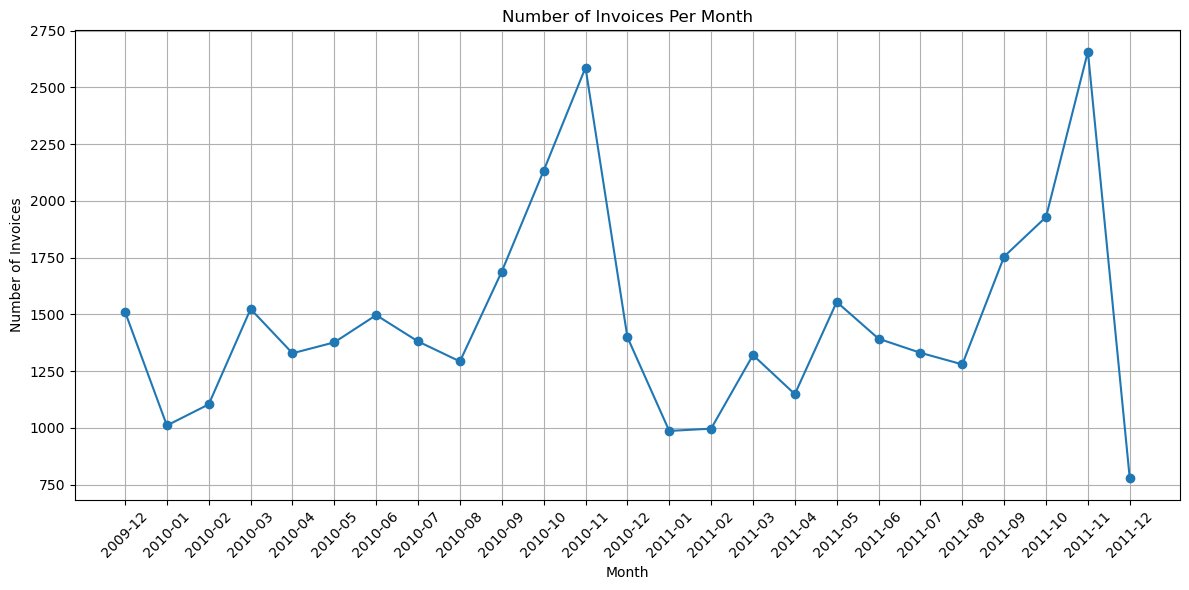

In [844]:

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(invoices_per_month['YearMonth'].astype(str), invoices_per_month['InvoiceCount'], marker='o')
plt.title("Number of Invoices Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Invoices")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig("../Images/invoices.png", dpi=300, bbox_inches="tight")
plt.savefig("../Images/invoices.svg", dpi=300, bbox_inches="tight")

plt.show()


/var/folders/ns/qb8p83md6vj7grr6x33sxq780000gn/T/ipykernel_8142/1385590174.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(invoices_per_month['YearMonth'].astype('string'), rotation=45)


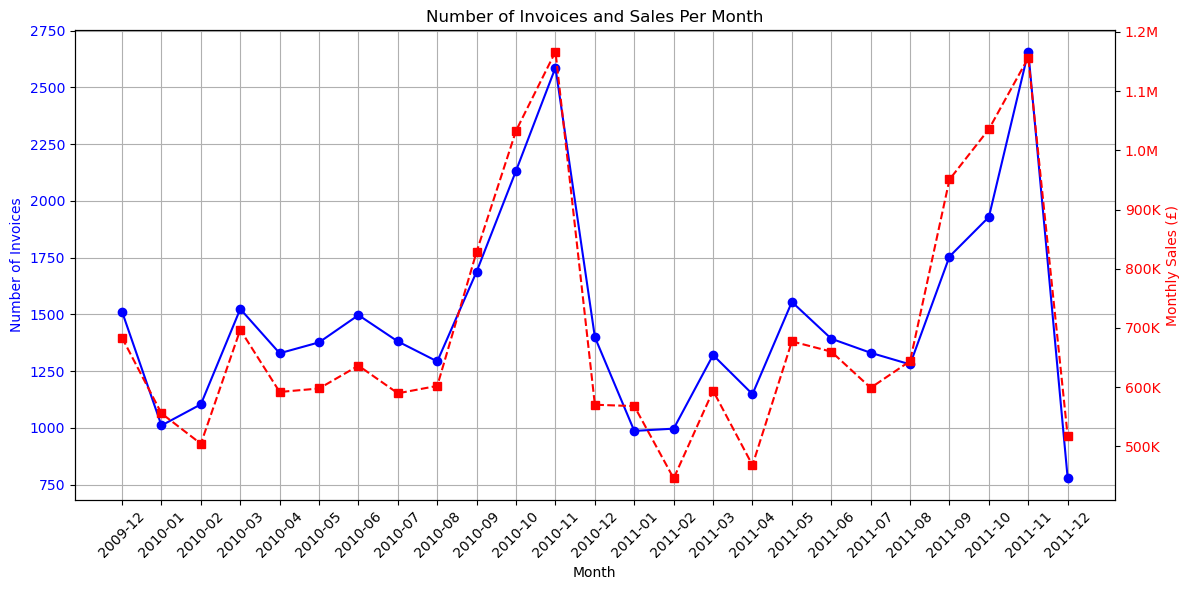

In [1081]:
# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# First line plot (Number of Invoices)
ax1.plot(invoices_per_month['YearMonth'].astype('string'), invoices_per_month['InvoiceCount'], marker='o', label="Monthly Invoices", color='b')
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Invoices", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Second y-axis for Sales
ax2 = ax1.twinx()
ax2.plot(invoices_per_month['YearMonth'].astype('string'), invoices_per_month['MonthlySales'], marker='s', linestyle='--', label="Monthly Sales", color='r')
ax2.set_yticks(ticks=[500000, 600000, 700000, 800000, 900000,1000000, 1100000,1200000],  labels=['500K', '600K', '700K', '800K', '900K', '1.0M', '1.1M', '1.2M'])
ax2.set_ylabel("Monthly Sales (£)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and grid
plt.title("Number of Invoices and Sales Per Month")
ax1.set_xticklabels(invoices_per_month['YearMonth'].astype('string'), rotation=45)
ax1.grid(True)

# Save the figure
plt.savefig("../Images/invoices_sales.png", dpi=300, bbox_inches="tight")
plt.savefig("../Images/invoices_sales.svg",dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()


In [845]:
# Count sales per month
sales_per_month = has_id.groupby('YearMonth')['Sales'].sum()

# Convert to DataFrame for easier visualization
sales_per_month = sales_per_month.reset_index()
sales_per_month.columns = ['YearMonth', 'MonthlySales']

# Display the result
print(sales_per_month)

   YearMonth  MonthlySales
0    2009-12      683504.0
1    2010-01   555802.6875
2    2010-02  504558.96875
3    2010-03      696978.5
4    2010-04      591982.0
5    2010-05    597833.375
6    2010-06    636371.125
7    2010-07   589736.1875
8    2010-08    602224.625
9    2010-09   829013.9375
10   2010-10     1033112.0
11   2010-11     1166460.0
12   2010-12     570422.75
13   2011-01   568101.3125
14   2011-02  446084.90625
15   2011-03     594081.75
16   2011-04  468374.34375
17   2011-05    677355.125
18   2011-06   660046.0625
19   2011-07    598962.875
20   2011-08   644051.0625
21   2011-09   950690.1875
22   2011-10  1035642.4375
23   2011-11   1156205.625
24   2011-12   517208.4375


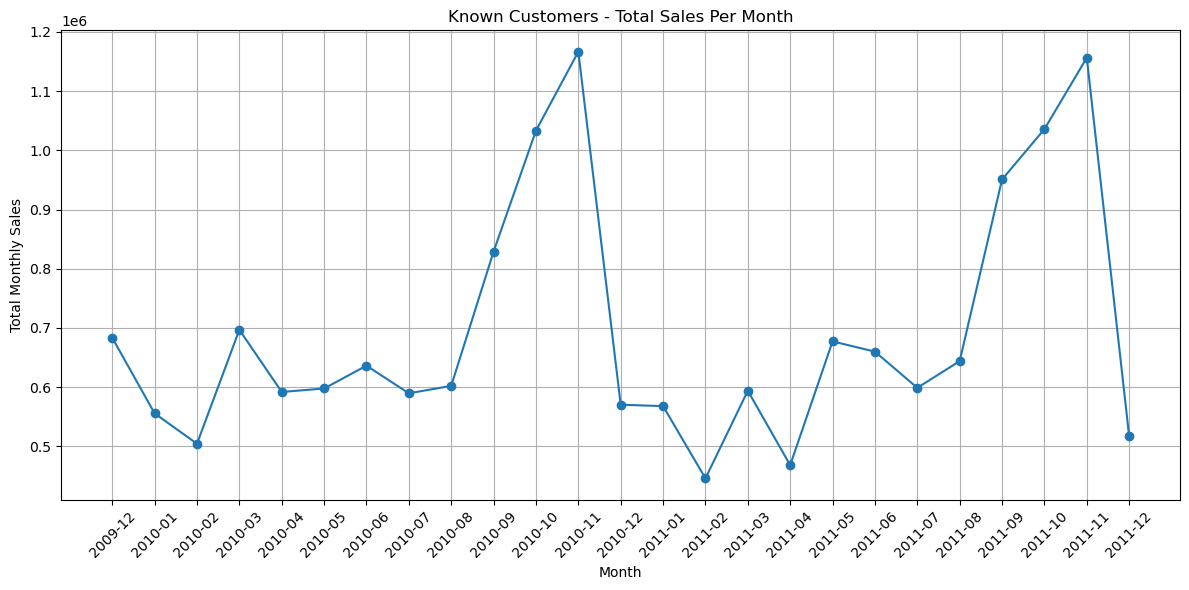

In [846]:
# Line plot
plt.figure(figsize=(12, 6))
plt.plot(sales_per_month['YearMonth'].astype(str), sales_per_month['MonthlySales'], marker='o')
plt.title("Known Customers - Total Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig("../Images/has_id_Monthly_Sales.png", dpi=300, bbox_inches="tight")
plt.savefig("../Images/has_id_Monthly_Sales.svg", dpi=300, bbox_inches="tight")

plt.show()

In [847]:
has_id.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [848]:
has_id.InvoiceDate.min()

Timestamp('2009-12-01 07:45:00')

#### Price
* Median price for any given item is 1.95 with a mean price of 3.22

In [850]:
has_id.Price.describe([.25,.5,.75,.95,.999]).round(2)

count   779425.0
mean        3.22
std        29.62
min          0.0
25%         1.25
50%         1.95
75%         3.75
95%          8.5
99.9%      49.95
max      10953.5
Name: Price, dtype: float64

In [851]:
# percent of items $5 or less

len(has_id[has_id.Price<=5])/len(has_id)

0.8615261250280656

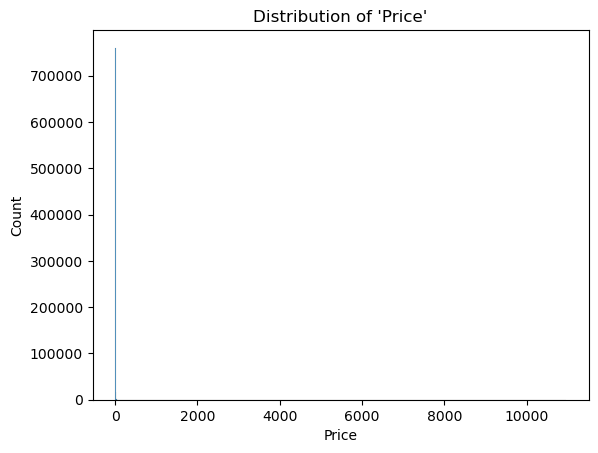

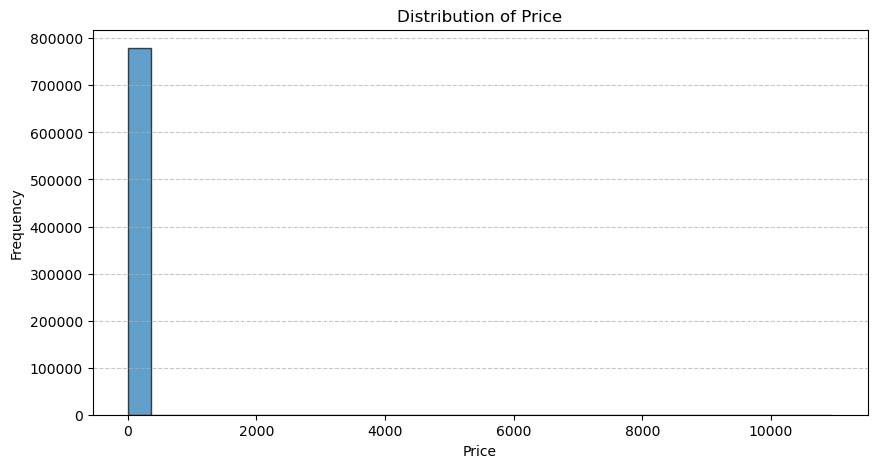

In [852]:
sns.histplot(has_id.Price, bins=int(np.sqrt(len(has_id))))
plt.title("Distribution of 'Price'")
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(has_id['Price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


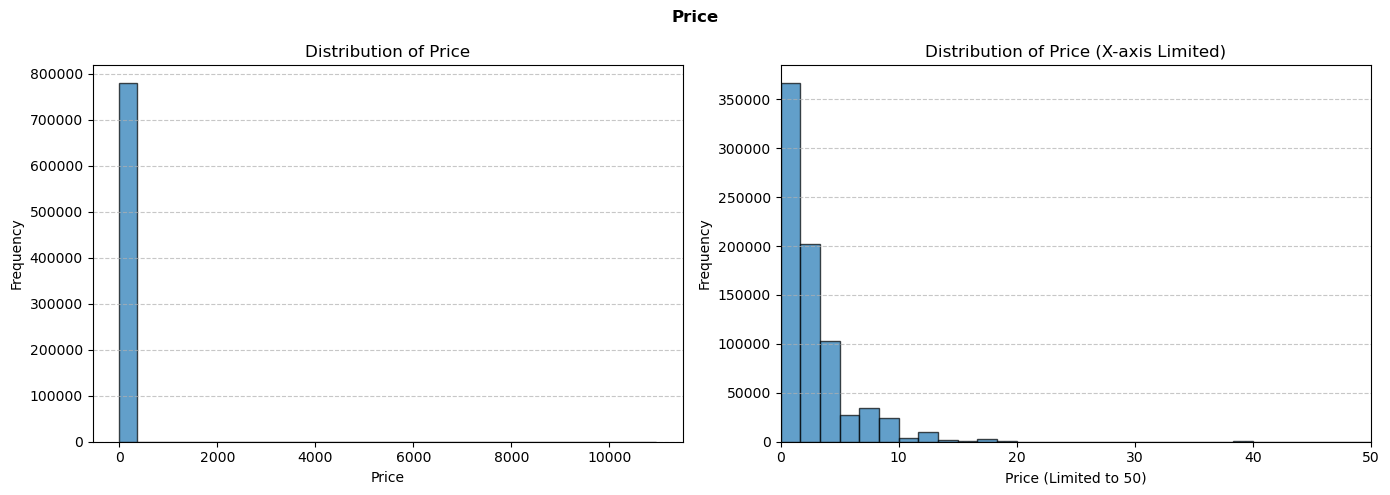

In [853]:
# # fig,ax = plt.subplots(1,2, sharey=True)

# # ax[0].hist(has_id['Price'], bins=30, edgecolor='black', alpha=0.7)
# # # ax[0].set_ylabel('Frequency')
# # # ax[0].set_label('Price')

# plt.suptitle('Distribution of Price')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Standard histogram
axes[0].hist(has_id['Price'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Price')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: Histogram with x-axis limited to 15
axes[1].hist(has_id[has_id['Price']<50]['Price'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Price (Limited to 50)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Price (X-axis Limited)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlim(0, 50)  # Limit x-axis



# Add a figure title
fig.suptitle('Price', fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title


plt.savefig("../Images/Price.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/Price.svg", dpi=300, bbox_inches="tight")  # Save as SVG

# Adjust layout and display
plt.tight_layout()
plt.show()


In [854]:
# top items based on price
top_items_by_price = has_id[['StockCode', 'Description', 'Price']].drop_duplicates()
top_items_by_price = top_items_by_price.nlargest(25, 'Price')

print(top_items_by_price)


        StockCode     Description              Price
130893          M          Manual            10953.5
348321          M          Manual   10468.7998046875
72226           M          Manual     8985.599609375
680662       POST         POSTAGE            8142.75
125938          M          Manual     6958.169921875
923997          M          Manual   4161.06005859375
908368          M          Manual  3949.320068359375
280026          M          Manual             3610.5
877473          M          Manual  3155.949951171875
348351          M          Manual   2769.89990234375
407137          M          Manual  2736.159912109375
382869          M          Manual    2667.8798828125
363800          M          Manual   2545.85009765625
801899          M          Manual             2500.0
652929          M          Manual     2382.919921875
383026          M          Manual     2225.169921875
908369          M          Manual  2118.739990234375
652932          M          Manual  2053.070068

Explore 'Manual' 
* Manual entries are mixed.  from a small sample of entries explores it appears the lower prices manual entries are often single lines or included in other invoices.  The Larger priced manual entries are single lines possibly representing entire orders.  There is no clarity in either case as the 'Description' is only 'Manual'.
* The company is based in the UK  with aproximatey 90% of their orders from the UK but only 39% of manual orders are from the UK. 

In [856]:
manual = has_id[has_id.StockCode=='M'] # 681 rows
# manual[manual.Price>14.95] # returns 164 rows -- 99% are below 14.95
# manual[manual.Price>100] # returns 113 rows
# manual[manual.Price>500] # returns 36 rows
has_id[has_id.StockCode=='M'].Invoice.nunique() # 620

620

In [857]:
has_id.Country.value_counts(normalize=True).round(4).head()*100

Country
United Kingdom   89.86
Germany           2.11
EIRE               2.0
France            1.73
Netherlands       0.65
Name: proportion, dtype: Float64

In [858]:
manual['Country'].value_counts(normalize=True).round(2) # .39 in UK
# manual[manual.Price>14.95]['Country'].value_counts(normalize=True).round(2) # .55 in UK
# manual[manual.Price>50]['Country'].value_counts(normalize=True).round(2) # .48 in UK
# manual[manual.Price>100]['Country'].value_counts(normalize=True).round(2) # .42 in UK
# manual[manual.Price>300]['Country'].value_counts(normalize=True).round(2) # .38 in UK
# manual[manual.Price>500]['Country'].value_counts(normalize=True).round(2)  # .34 in UK
# manual[manual.Price>750]['Country'].value_counts(normalize=True).round(2)  # .37 in UK
# manual[manual.Price>1000]['Country'].value_counts(normalize=True).round(2)  # .39 in UK
# manual[manual.Price>2000]['Country'].value_counts(normalize=True).round(2)  # .45 in UK

Country
United Kingdom         0.87
EIRE                   0.04
Germany                0.02
France                 0.01
Portugal               0.01
Singapore              0.01
Netherlands            0.01
Australia              0.01
Norway                 0.01
Sweden                  0.0
Austria                 0.0
Malta                   0.0
Spain                   0.0
Belgium                 0.0
USA                     0.0
United Arab Emirates    0.0
Cyprus                  0.0
Finland                 0.0
Channel Islands         0.0
Name: proportion, dtype: Float64

In [859]:
# has_id[has_id.Invoice == '492650']
# has_id[has_id.Invoice == '490300'].head(40)
# has_id[has_id.Invoice == '490760']
has_id[has_id.Invoice == '573077']
# has_id[has_id.Invoice == '491176']
# has_id[has_id.Invoice == '576389']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,YearMonth
923997,573077,M,Manual,1,2011-10-27 14:13:00,4161.06005859375,12536.0,France,4161.06005859375,2011-10


In [860]:
has_id.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales', 'YearMonth'],
      dtype='object')

In [861]:
##### Explore Items stockcodes with price > 50 #####
high_price = has_id[has_id.Price>50]['StockCode'].unique().tolist()
high_price
# has_id[has_id.Price>50].shape # 513 line items
# has_id[has_id.Price>50].StockCode.nunique() # 27 unique StockCode

['POST',
 '21769',
 'M',
 '84967B',
 'ADJUST',
 '84962',
 '84964B',
 '84964A',
 '84965B',
 '84965A',
 '21760',
 '84632',
 'D',
 '85070',
 '84967C',
 'ADJUST2',
 '22656',
 '22655',
 'C2',
 '22827',
 '22828',
 '84967A',
 '22823',
 '22929',
 '22826',
 '22502',
 'DOT']

In [862]:
has_id[has_id.Price>50][['StockCode', 'Description']].value_counts()

StockCode  Description                        
M          Manual                                 133
22655      VINTAGE RED KITCHEN CABINET             50
21769      VINTAGE POST OFFICE CABINET             48
22826      LOVE SEAT ANTIQUE WHITE METAL           41
POST       POSTAGE                                 38
22656      VINTAGE BLUE KITCHEN CABINET            36
22827      RUSTIC  SEVENTEEN DRAWER SIDEBOARD      29
22823      CHEST NATURAL WOOD 20 DRAWERS           18
22929      SCHOOL DESK AND CHAIR                   17
ADJUST     Adjustment by john on 26/01/2010 16     14
DOT        DOTCOM POSTAGE                          13
21760      FRENCH STYLE WALL DRESSER               12
22828      REGENCY MIRROR WITH SHUTTERS            11
84632      DECORATIVE HANGING SHELVING UNIT         9
84967B     BLUE KASHMIRI OCCASIONAL TABLE           7
ADJUST     Adjustment by john on 26/01/2010 17      7
22827      GIANT SEVENTEEN DRAWER SIDEBOARD         6
85070      ANT WHITE SWEETHEART TAB

In [863]:
unique_stock = ['POST', 'M', 'ADJUST', 'D', 'ADJUST2', 'C2', 'DOT']
has_id[has_id.StockCode.isin(unique_stock)].Description.value_counts()

Description
POSTAGE                                1803
Manual                                  681
CARRIAGE                                248
Adjustment by john on 26/01/2010 16      18
DOTCOM POSTAGE                           16
Adjustment by john on 26/01/2010 17      14
Discount                                  5
Adjustment by Peter on Jun 25 2010        3
Name: count, dtype: Int64

In [864]:
has_id[~has_id.StockCode.isin(unique_stock)].describe()

,Quantity,InvoiceDate,Price,Sales
count,776637.0,776637,776637.0,776637.0
mean,13.51833224530894,2011-01-03 00:29:29.111670016,2.934974431991577,21.978424072265625
min,1.0,2009-12-01 07:45:00,0.0010000000474974513,0.0010000000474974513
25%,2.0,2010-07-02 14:15:00,1.25,4.949999809265137
50%,6.0,2010-12-02 13:44:00,1.9500000476837158,12.449999809265137
75%,12.0,2011-08-01 13:31:00,3.75,19.799999237060547
max,80995.0,2011-12-09 12:50:00,649.5,168469.59375
std,146.09108927885822,NaN,4.2945027351379395,225.80364990234375


In [865]:
has_id[has_id.Quantity>5000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,YearMonth
7141,490018,21967,PACK OF 12 SKULL TISSUES,5184,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,1296.0,2009-12
63261,495194,37410,BLACK AND WHITE PAISLEY FLOWER MUG,6012,2010-01-21 15:11:00,0.10000000149011612,13902.0,Denmark,601.2000122070312,2010-01
63263,495194,16044,POP-ART FLUORESCENT PENS,6144,2010-01-21 15:11:00,0.05999999865889549,13902.0,Denmark,368.6400146484375,2010-01
63269,495194,20759,CHRYSANTHEMUM POCKET BOOK,5280,2010-01-21 15:11:00,0.10000000149011612,13902.0,Denmark,528.0,2010-01
63272,495194,20756,GREEN FERN POCKET BOOK,5280,2010-01-21 15:11:00,0.10000000149011612,13902.0,Denmark,528.0,2010-01
63274,495194,20991,JAZZ HEARTS MAGNETIC MEMO PAD,6768,2010-01-21 15:11:00,0.10000000149011612,13902.0,Denmark,676.7999877929688,2010-01
63275,495194,20993,JAZZ HEARTS MEMO PAD,9312,2010-01-21 15:11:00,0.10000000149011612,13902.0,Denmark,931.2000122070312,2010-01
88088,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10000000149011612,13902.0,Denmark,1915.199951171875,2010-02
88097,497946,47503E,ASS FLORAL PRINT SCISSORS,6696,2010-02-15 11:57:00,0.15000000596046448,13902.0,Denmark,1004.4000244140625,2010-02
90833,498152,85220,SMALL FAIRY CAKE FRIDGE MAGNETS,9456,2010-02-17 10:51:00,0.30000001192092896,13902.0,Denmark,2836.800048828125,2010-02


In [866]:
has_id[has_id['Customer ID']=='16446.0']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,YearMonth
701205,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.649999976158142,16446.0,United Kingdom,1.649999976158142,2011-05
701206,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25,2011-05
1040187,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.0799999237060547,16446.0,United Kingdom,168469.59375,2011-12


In [867]:
df[df['Customer ID']=='16446.0']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
701205,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.649999976158142,16446.0,United Kingdom,1.649999976158142
701206,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25
1040187,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.0799999237060547,16446.0,United Kingdom,168469.59375


#### Sales

In [869]:
has_id.Sales.describe([.25,.5,.75,.95,.97]).round(2)

count    779425.0
mean        22.29
std        227.25
min           0.0
25%          4.95
50%         12.48
75%          19.8
95%          67.5
97%          99.6
max     168469.59
Name: Sales, dtype: float64

In [870]:
has_id[has_id.Sales<1]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,YearMonth
360,489517,22335,HEART DECORATION PAINTED ZINC,1,2009-12-01 11:34:00,0.6499999761581421,16329.0,United Kingdom,0.6499999761581421,2009-12
364,489517,21790,VINTAGE SNAP CARDS,1,2009-12-01 11:34:00,0.8500000238418579,16329.0,United Kingdom,0.8500000238418579,2009-12
592,489529,22030,SWALLOWS GREETING CARD,1,2009-12-01 11:51:00,0.41999998688697815,17984.0,United Kingdom,0.41999998688697815,2009-12
593,489529,21081,SET/20 POSIES PAPER NAPKINS,1,2009-12-01 11:51:00,0.8500000238418579,17984.0,United Kingdom,0.8500000238418579,2009-12
604,489529,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,1,2009-12-01 11:51:00,0.8500000238418579,17984.0,United Kingdom,0.8500000238418579,2009-12
...,...,...,...,...,...,...,...,...,...,...
1041602,581580,21803,CHRISTMAS TREE STAR DECORATION,2,2011-12-09 12:20:00,0.41999998688697815,12748.0,United Kingdom,0.8399999737739563,2011-12
1041603,581580,21809,CHRISTMAS HANGING TREE WITH BELL,2,2011-12-09 12:20:00,0.38999998569488525,12748.0,United Kingdom,0.7799999713897705,2011-12
1041604,581580,20974,12 PENCILS SMALL TUBE SKULL,1,2011-12-09 12:20:00,0.6499999761581421,12748.0,United Kingdom,0.6499999761581421,2011-12
1041608,581580,22695,WICKER WREATH SMALL,1,2011-12-09 12:20:00,0.5899999737739563,12748.0,United Kingdom,0.5899999737739563,2011-12


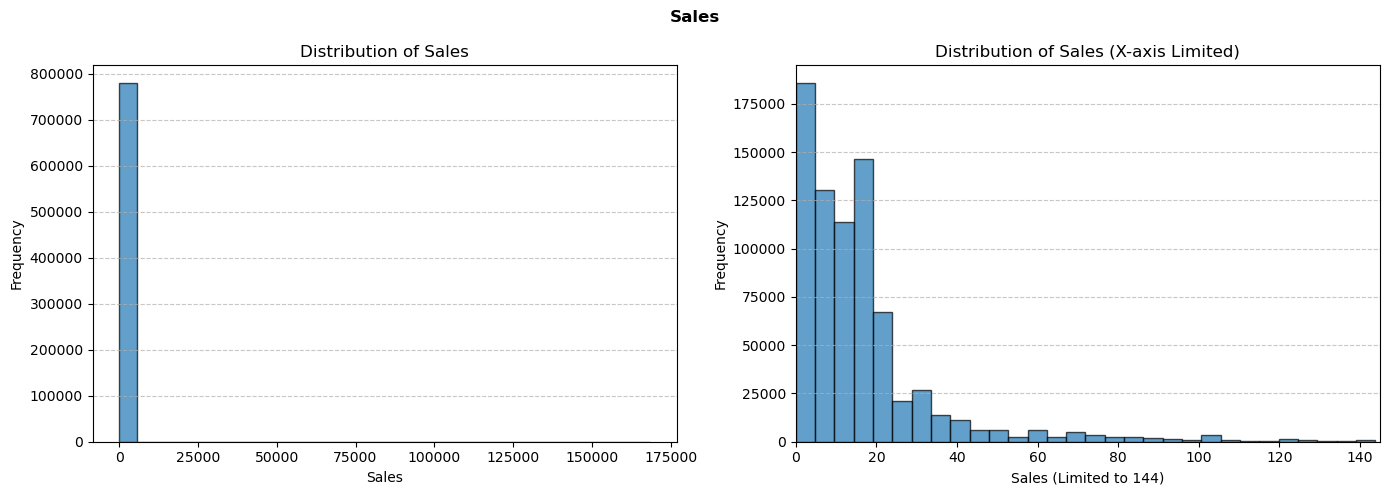

In [871]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Standard histogram
axes[0].hist(has_id['Sales'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sales')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: Histogram with x-axis limited to 140
axes[1].hist(has_id[has_id['Sales']<144]['Sales'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Sales (Limited to 144)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sales (X-axis Limited)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlim(0, 145)  # Limit x-axis


# Add a figure title
fig.suptitle('Sales', fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title


plt.savefig("../Images/Sales.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/Sales.svg", dpi=300, bbox_inches="tight")  # Save as SVG

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Customer ID
* Top ten customers ar listed.  
* The top 5 customers make 11.3% of all Sales
* Top five customers range from 51 unique invoices to 398 unique invoices

In [873]:
has_id['Customer ID'].nunique()

5878

In [874]:
import pandas as pd

# Group by 'Customer ID' and calculate total sales
customer_sales = has_id.groupby('Customer ID').agg(
    Total_Sales=('Sales', 'sum'),  # Sum of sales
    Country=('Country', 'first'),  # Extract the country (assuming it's the same for each customer)
    Unique_Invoices=('Invoice', 'nunique')  # Count unique invoices per customer
)

# Calculate average sales per invoice
customer_sales['Avg_Sales_per_Invoice'] = customer_sales['Total_Sales'] / customer_sales['Unique_Invoices']

# Extract the top 5 customers by 'Total_Sales'
top_five_customers = customer_sales.nlargest(5, 'Total_Sales').reset_index()
top_five_customers.Total_Sales = top_five_customers.Total_Sales.round(2)

print('Summary Information for Top 5 Customers by Sales')
print()
top_five_customers

Summary Information for Top 5 Customers by Sales



,Customer ID,Total_Sales,Country,Unique_Invoices,Avg_Sales_per_Invoice
0,18102.0,580987.0625,United Kingdom,145,4006.807327586207
1,14646.0,528602.5,Netherlands,151,3500.67880794702
2,14156.0,313437.625,EIRE,156,2009.215544871795
3,14911.0,291420.8125,EIRE,398,732.2130967336683
4,17450.0,244784.234375,United Kingdom,51,4799.691176470588


In [875]:
top_five_customers.Total_Sales.sum()/has_id.Sales.sum()

0.11276284

In [876]:
#Top ten customers by total sales
customer_sales = has_id.groupby('Customer ID')['Sales'].sum().round(2)
customer_sales.sort_values(ascending=False).head(5)

Customer ID
18102.0     580987.0625
14646.0        528602.5
14156.0      313437.625
14911.0     291420.8125
17450.0   244784.234375
Name: Sales, dtype: float32

In [877]:
# top_5_customer_list = has_id.groupby('Customer ID')['Sales'].sum().nlargest(5).index.tolist()
# top_5_customer_list

In [878]:
# top_5_info = has_id.groupby('Customer ID')['Sales'].sum().nlargest(5).reset_index()
# top_5_info

In [879]:
# top_5_info['Num_of_Invoices'] = top_5.groupby('Customer ID')['Invoice'].nunique()
# top_5_info

In [880]:
#percent of sales each of top 10 represents
customer_sales_percent = customer_sales/customer_sales.sum()*100
customer_sales_percent.sort_values(ascending=False).head(10)

Customer ID
18102.0     3.34384822845459
14646.0    3.042351007461548
14156.0   1.8039779663085938
14911.0   1.6772608757019043
17450.0   1.4088460206985474
13694.0   1.1260021924972534
17511.0   0.9907039999961853
16446.0   0.9696367979049683
16684.0   0.8468744158744812
12415.0   0.8314244747161865
Name: Sales, dtype: float32

In [881]:
# percent of sales from top 5 customers
3.34384822845459+3.042351007461548+1.8039779663085938+1.6772608757019043+1.4088460206985474 

11.276284098625183

In [882]:
# has_id[has_id['Customer ID']=='18102.0']['Invoice'].nunique() # 145 unique invoices
# has_id[has_id['Customer ID']=='14646.0']['Invoice'].nunique()  # 151 unique invoices
# has_id[has_id['Customer ID']=='14156.0']['Invoice'].nunique()  # 156 unique invoices
# has_id[has_id['Customer ID']=='14911.0']['Invoice'].nunique()  # 398 unique invoices
has_id[has_id['Customer ID']=='17450.0']['Invoice'].nunique()  # 51 unique invoices

51

#### Country
* UK represents 82% of Sales with the Republic of Ireland, Netherlands, Germany, and France rounding out the top five countries by Sales

In [884]:
has_id.Country.nunique()

41

In [885]:
# Percent of invoices from UK
has_id.groupby('Country').Invoice.nunique().sort_values(ascending=False)[0]/has_id.Invoice.nunique()

0.9072736617165733

In [1029]:
# Compute percentage sales per country
top_countries_sales = has_id.groupby('Country')['Sales'].sum().sort_values(ascending=False).round(2).to_frame(name='Total_Sales')
top_countries_sales.head()

,Total_Sales
Country,
United Kingdom,14389235.0
EIRE,616570.5625
Netherlands,554038.0625
Germany,425019.71875
France,348768.96875


In [1055]:
import pandas as pd

# Creating the DataFrame
data = {
    "Country": ["United Kingdom", "EIRE", "Netherlands", "Germany", "France"],
    "Total_Sales": [14389235.0, 616570.56, 554038.06, 425019.72, 348768.97]
}

top_countries = pd.DataFrame(data)
top_countries['Percent_of_Sales'] = round(top_countries.Total_Sales/has_id.Sales.sum()*100,2)
top_countries

,Country,Total_Sales,Percent_of_Sales
0,United Kingdom,14389235.0,82.82
1,EIRE,616570.56,3.55
2,Netherlands,554038.06,3.19
3,Germany,425019.72,2.45
4,France,348768.97,2.01


In [1007]:
top_countries_sales = has_id.groupby('Country')['Sales'].sum().sort_values(ascending=False)/has_id['Sales'].sum()
top_countries_sales.round(4).nlargest(5)*100

Country
United Kingdom    82.81999969482422
EIRE             3.5500001907348633
Netherlands       3.190000057220459
Germany           2.450000047683716
France            2.009999990463257
Name: Sales, dtype: float32

## Summary Stats - aggregated by 'Invoice'

### 'StockCode' / 'Description'
Note: This analysis will focus on 'StockCode' instead of 'Description' as previous analysis showed that 'Description' for multiple items has changed over time but the 'StockCode' has stayed the same.
* The distribution of unique 'StockCode' per 'Invoice' is skewed right.
* Average number of unique 'StockCode' per 'Invoice' is 20.8 with a Median number of 15
* approximately 5.5% of 'Invoice' are considered outliers by the number of unique 'StockCode'

In [889]:
# StockCode: Sumary Stats for known customers
has_id_stock = has_id.groupby('Invoice')['StockCode'].nunique()
has_id_stock.describe() 

count             36969.0
mean    20.79756011793665
std     22.39987275392407
min                   1.0
25%                   6.0
50%                  15.0
75%                  27.0
max                 541.0
Name: StockCode, dtype: float64

Text(0.5, 1.0, "Distribution of unique 'StockCode' per 'Invoice'")

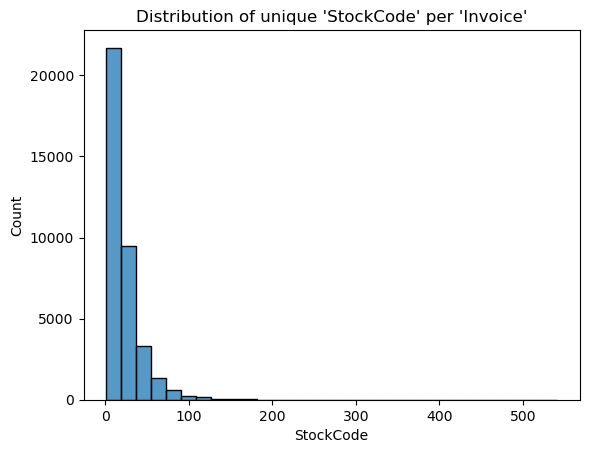

In [1087]:
sns.histplot(has_id_stock, bins=30)
plt.title("Distribution of unique 'StockCode' per 'Invoice'")


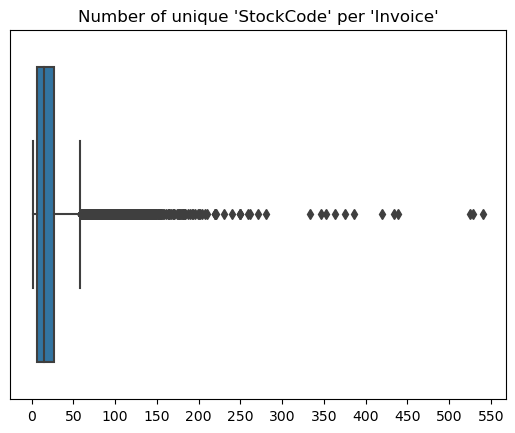

In [891]:
sns.boxplot(has_id_stock, orient='h')
plt.title("Number of unique 'StockCode' per 'Invoice'")

plt.yticks([])
plt. xticks(list(range(0,575, 50)))
plt.show()

In [894]:
stockcode_counts.describe()

count              36969.0
mean    21.083204847304497
std      22.96476280320055
min                    1.0
25%                    6.0
50%                   15.0
75%                   27.0
max                  542.0
Name: StockCode, dtype: float64

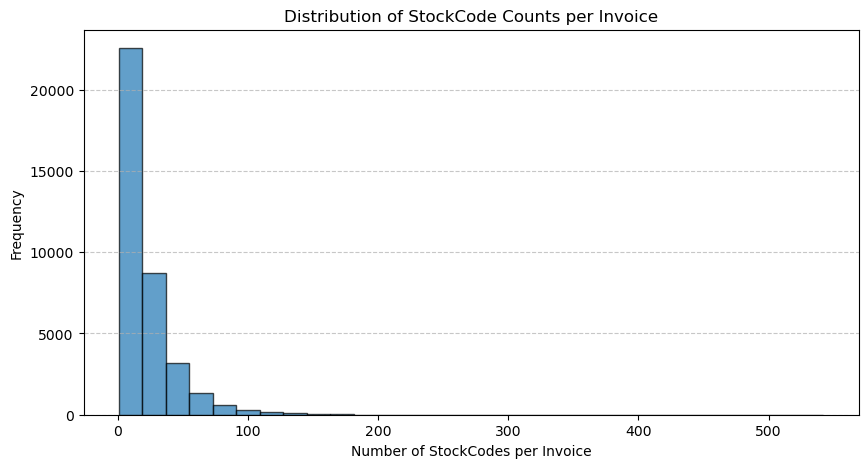

In [895]:
import matplotlib.pyplot as plt

# Count the number of StockCode entries per Invoice
stockcode_counts = has_id.groupby('Invoice')['StockCode'].count()

# Create histogram
plt.figure(figsize=(10, 5))
plt.hist(stockcode_counts, bins=30, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Number of StockCodes per Invoice')
plt.ylabel('Frequency')
plt.title('Distribution of StockCode Counts per Invoice')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [896]:
has_id_stock.describe()

count             36969.0
mean    20.79756011793665
std     22.39987275392407
min                   1.0
25%                   6.0
50%                  15.0
75%                  27.0
max                 541.0
Name: StockCode, dtype: float64

In [897]:
# percent of 'Invoice' with less than 100 
len(has_id_stock[has_id_stock<=100])/len(has_id_stock)

0.9895317698612351

In [898]:
# number of outliers -- Approximately 5.5% of invoices
top = has_id_stock.quantile(.75)+(1.5*(has_id_stock.quantile(.75)-has_id_stock.quantile(.25)))
#58.5
outliers = has_id_stock[has_id_stock> top].count()
#2045
outliers/len(has_id_stock)

0.05531661662473965

#### 'Quantity'

This represents the total number of items purchased per 'Invoice'
* The distribution of 'Quantity' per 'Invoice' is highly skewed right
* Average 'Quantity' purchased per 'Invoice' is 284.4 with a Median number of 151
* approximately 7.4% of 'Invoice' are considered outliers by the 'Quantity' purchased.

In [900]:
has_id_quantity = has_id.groupby('Invoice')['Quantity'].sum()
has_id_quantity.describe()

count              36969.0
mean     284.3991452297871
std     1232.3822594853275
min                    1.0
25%                   72.0
50%                  151.0
75%                  287.0
max                87167.0
Name: Quantity, dtype: float64

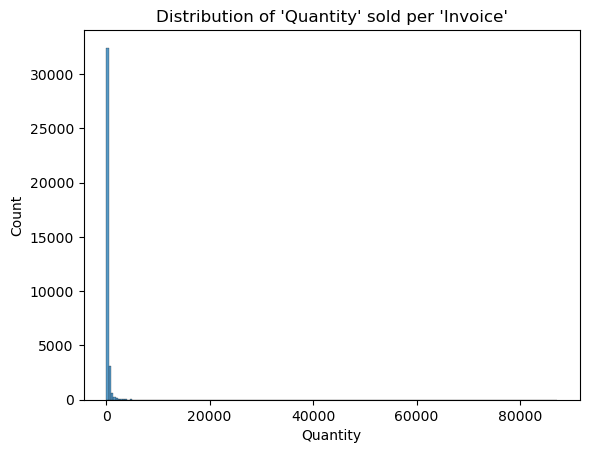

In [901]:
sns.histplot(has_id_quantity, bins=int(np.sqrt(len(has_id_quantity))))
plt.title("Distribution of 'Quantity' sold per 'Invoice'")
plt.show()

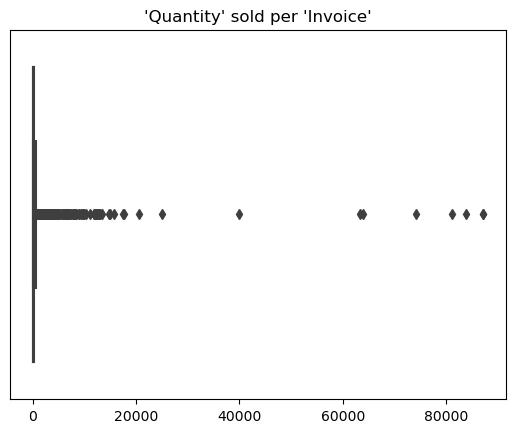

In [902]:
sns.boxplot(has_id_quantity, orient='h')
plt.title("'Quantity' sold per 'Invoice'")

plt.yticks([])
plt.show()

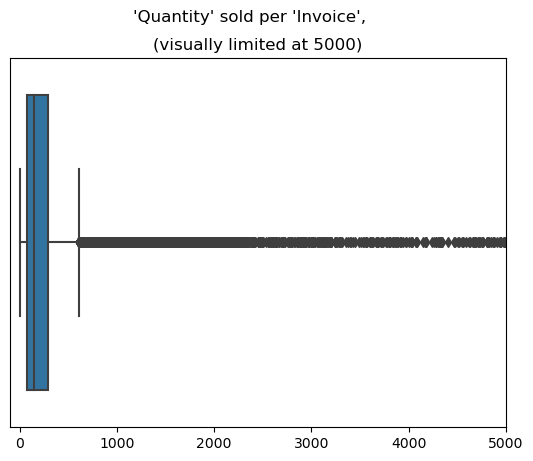

In [903]:
sns.boxplot(has_id_quantity, orient='h')
plt.suptitle("'Quantity' sold per 'Invoice',")
plt.title('(visually limited at 5000)')
plt.xlim(-100,5000)
plt.yticks([])
plt.show()

In [904]:
# number of outliers -- Approximately 7.4% of invoices
top = has_id_quantity.quantile(.75)+(1.5*(has_id_quantity.quantile(.75)-has_id_quantity.quantile(.25)))
#top = 609.5
outliers = has_id_quantity[has_id_quantity> top].count()
#outliers = 2745
outliers/len(has_id_quantity)

0.07425139982147204

In [905]:
has_id_quantity.describe([.25, .5, .75, .95,.997])

count              36969.0
mean     284.3991452297871
std     1232.3822594853275
min                    1.0
25%                   72.0
50%                  151.0
75%                  287.0
95%                  776.0
99.7%               4752.0
max                87167.0
Name: Quantity, dtype: float64

#### 'Sales'

This represents the total 'Sales' amount per 'Invoice'
* The distribution of 'Sales' per 'Invoice' is highly skewed right
* Average 'Sales' per 'Invoice' is 469.98 with a Median number of 303.04
* approximately 7.8% of 'Invoice' are considered outliers by the 'Sales'.

In [907]:
# Sales: Summary Stats for known customers
has_id_sales = has_id.groupby('Invoice')['Sales'].sum()
has_id_sales.describe().round(2)

count     36969.0
mean       469.98
std       1359.74
min          0.38
25%        157.92
50%        303.04
75%        477.28
max     168469.59
Name: Sales, dtype: float64

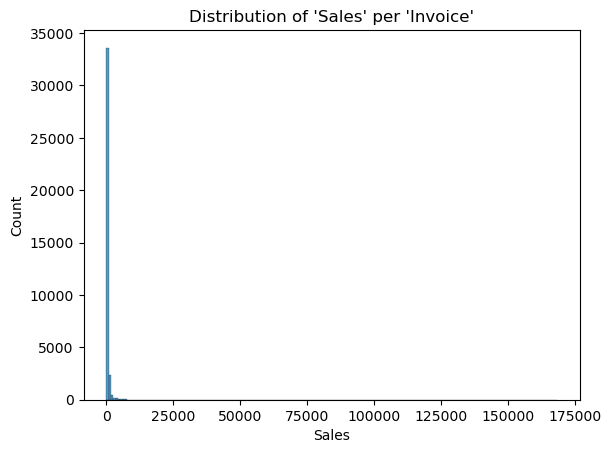

In [908]:
sns.histplot(has_id_sales, bins=int(np.sqrt(len(has_id_sales))))
plt.title("Distribution of 'Sales' per 'Invoice'")
plt.show()

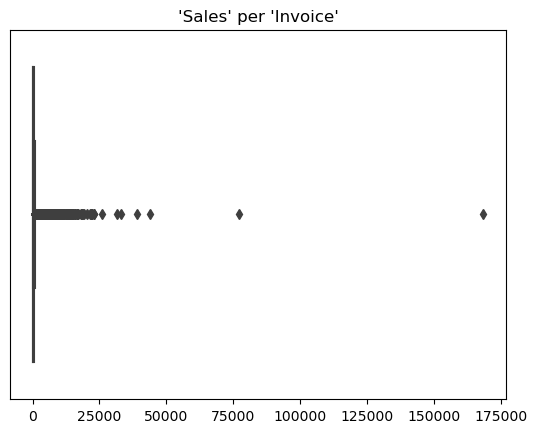

In [909]:
sns.boxplot(has_id_sales, orient='h')
plt.title("'Sales' per 'Invoice'")

plt.yticks([])
plt.show()

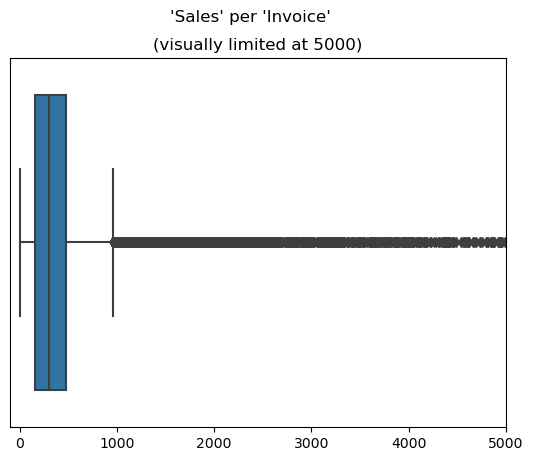

In [910]:
sns.boxplot(has_id_sales, orient= 'h')
plt.suptitle("'Sales' per 'Invoice'")
plt.title('(visually limited at 5000)')
plt.xlim(-100,5000)

plt.yticks([])
plt.show()

In [911]:
# number of outliers -- Approximately 7.9% of invoices
top = has_id_sales.quantile(.75)+(1.5*(has_id_sales.quantile(.75)-has_id_sales.quantile(.25)))
# #top = 956.32
outliers = has_id_sales[has_id_sales> top].count()
# #outliers = 2907
outliers/len(has_id_sales)

0.07863344964700154

In [912]:
has_id_sales.describe([.25, .5, .75, .95,.997])

count              36969.0
mean     469.9830627441406
std     1359.7381591796875
min     0.3799999952316284
25%      157.9199981689453
50%      303.0400085449219
75%      477.2799987792969
95%      1230.990014648437
99.7%    7551.333484374848
max           168469.59375
Name: Sales, dtype: float64

In [913]:
has_id.describe()

,Quantity,InvoiceDate,Price,Sales
count,779425.0,779425,779425.0,779425.0
mean,13.489369727683869,2011-01-03 01:44:42.593475584,3.2184879779815674,22.29182243347168
min,1.0,2009-12-01 07:45:00,0.0010000000474974513,0.0010000000474974513
25%,2.0,2010-07-02 14:39:00,1.25,4.949999809265137
50%,6.0,2010-12-02 14:09:00,1.9500000476837158,12.479999542236328
75%,12.0,2011-08-01 13:44:00,3.75,19.799999237060547
max,80995.0,2011-12-09 12:50:00,10953.5,168469.59375
std,145.85581409954753,NaN,29.624326705932617,227.24818420410156


#### 'Price'

There are known outliers in the dataset that skew the distribution of 'Price' right.  So the 'Price' explored is the median 'Price' of items sold per 'Invoice'.

* The distribution of median 'Price' per 'Invoice' is highly skewed right
* Average of the median 'Price' per 'Invoice' is 7.09 with a Median of 2.03
* Approximately 8.5% of 'Invoice' are considered outliers by the median 'Price'

In [915]:
# Price: range of prices for items sold in each 'Invoice'
has_id_price = has_id.groupby('Invoice')['Price'].agg(['mean','min', 'median', 'max'])

has_id_price.describe().round(2)

# use median due to skew

,mean,min,median,max
count,36969.0,36969.0,36969.0,36969.0
mean,7.84,5.51,7.09,15.27
std,131.68,131.12,131.65,134.55
min,0.06,0.0,0.06,0.06
25%,2.06,0.42,1.55,4.95
50%,2.86,0.55,2.03,8.5
75%,3.98,1.25,2.95,12.75
max,10953.5,10953.5,10953.5,10953.5


In [916]:
# Sales: Summary Stats for known customers
has_id_price_med = has_id.groupby('Invoice')['Price'].median()
has_id_price_med.describe().round(2)

count   36969.0
mean       7.09
std      131.65
min        0.06
25%        1.55
50%        2.03
75%        2.95
max     10953.5
Name: Price, dtype: float64

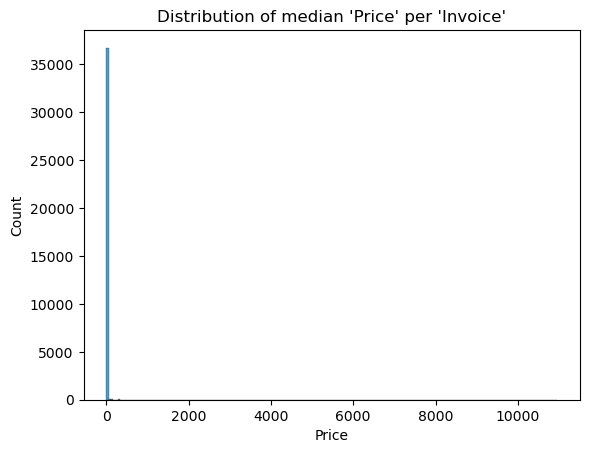

In [917]:
sns.histplot(has_id_price_med, bins=int(np.sqrt(len(has_id_price_med))))
plt.title("Distribution of median 'Price' per 'Invoice'")
plt.show()

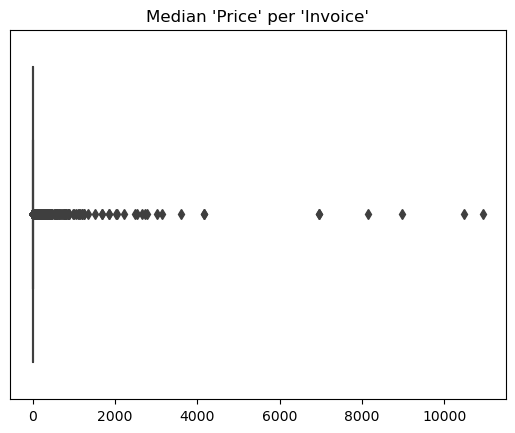

In [918]:
sns.boxplot(has_id_price_med, orient='h')
plt.title("Median 'Price' per 'Invoice'")

plt.yticks([])
plt.show()

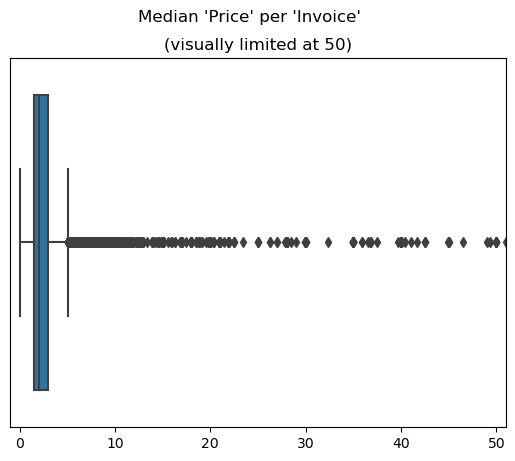

In [919]:
sns.boxplot(has_id_price_med, orient= 'h')
plt.suptitle("Median 'Price' per 'Invoice'")
plt.title('(visually limited at 50)')
plt.xlim(-1,51)

plt.yticks([])
plt.show()

In [920]:
# number of outliers -- Approximately 8.5% of invoices
top = has_id_price_med.quantile(.75)+(1.5*(has_id_price_med.quantile(.75)-has_id_price_med.quantile(.25)))
#top = 5.05
outliers = has_id_price_med[has_id_price_med> top].count()
#num of outliers = 3149
outliers/len(has_id_price_med)

0.08517947469501475

In [921]:
has_id_price_med.describe([.25, .5, .75, .95,.997])

count               36969.0
mean      7.094405174255371
std      131.65347290039062
min     0.05999999865889549
25%      1.5499999523162842
50%      2.0250000953674316
75%       2.950000047683716
95%                    6.75
99.7%    274.33441162109057
max                 10953.5
Name: Price, dtype: float64

In [1097]:
has_id.groupby('Invoice')[['Quantity', 'Price', 'Sales']].describe()

Quantity                                                            \
           count               mean                std  min  25%  50%  75%   
Invoice                                                                      
489434       8.0              20.75 12.646286863288031 10.0 12.0 18.0 24.0   
489435       4.0               15.0                6.0 12.0 12.0 12.0 15.0   
489436      19.0 10.157894736842104    5.8997472440656  2.0  5.0 12.0 12.0   
489437      23.0  6.304347826086956  4.149860705315033  1.0  3.0  6.0 12.0   
489438      17.0 48.588235294117645 14.013648808971075 28.0 32.0 56.0 60.0   
...          ...                ...                ...  ...  ...  ...  ...   
581583       2.0               38.0 2.8284271247461903 36.0 37.0 38.0 39.0   
581584       2.0               60.0  16.97056274847714 48.0 54.0 60.0 66.0   
581585      21.0 13.238095238095237  7.147760221948984  3.0 10.0 12.0 16.0   
581586       4.0               16.5  8.698658900466592  8.0  9.5 17.0 24.0   
581587      16.0              6.625   3.99791612384919  1.0  4.0  4.0 12.0   

             Price                                                           \
         max count               mean                std                min   
Invoice                                                                       
489434  48.0   8.0  4.081250190734863 2.7212045192718506               1.25   
489435  24.0   4.0              2.625 0.8616843819618225  1.649999976158142   
489436  24.0  19.0 3.7305266857147217  2.215268611907959               1.25   
489437  12.0  23.0  3.628260374069214 2.6974239349365234 0.6499999761581421   
489438  60.0  17.0  2.591176748275757 1.5405879020690918 0.9800000190734863   
...      ...   ...                ...                ...                ...   
581583  40.0   2.0 1.6500000953674316 0.2828426957130432 1.4500000476837158   
581584  72.0   2.0 1.2850000858306885 0.7990306615829468 0.7200000286102295   
581585  25.0  21.0  1.799047589302063 1.5824439525604248 0.1899999976158142   
581586  24.0   4.0  5.057499885559082  3.567476749420166               1.25   
581587  12.0  16.0            3.90625  3.951914072036743 0.8500000238418579   

                                                                  \
                       25%                50%                75%   
Invoice                                                            
489434  1.5499999821186066 4.0249998569488525               6.75   
489435  2.3249999582767487  2.549999952316284  2.849999964237213   
489436  1.6700000166893005  3.390000104904175  5.699999809265137   
489437                1.25  2.950000047683716  4.949999809265137   
489438   1.899999976158142 2.4000000953674316                2.5   
...                    ...                ...                ...   
581583  1.5500000417232513 1.6500000357627869 1.7500000298023224   
581584  1.0025000274181366 1.2850000262260437 1.5675000250339508   
581585  0.8500000238418579               1.25 2.0799999237060547   
581586   2.525000035762787  5.014999866485596  7.547499895095825   
581587  1.9500000476837158               3.75  4.150000095367432   

                          Sales                                        \
                      max count               mean                std   
Invoice                                                                 
489434  6.949999809265137   8.0  63.16250228881836 27.335479736328125   
489435               3.75   4.0  36.45000076293945  7.105631351470947   
489436                8.5  19.0 33.175262451171875 27.788341522216797   
489437  9.949999809265137  23.0 13.510869979858398 2.8389322757720947   
489438  6.400000095367432  17.0 134.48471069335938 103.37865447998047   
...                   ...   ...                ...                ...   
581583  1.850000023841858   2.0  62.29999923706055  6.081117153167725   
581584  1.850000023841858   2.0  70.31999969482422 26.134668350219727   
581585  5.949999809265137  21.0 15.669047355651855  

#### Grouped Dataframe
grouped_df will be created to collect above aggregated data that was grouped by 'Invoice' number.  'Description' will be excluded from the grouped_df because several 'StockCode' have multiple descriptions.
<br><br>
* Invoice: 'Invoice'
* StockCode: nunique stock code per 'Invoice'
* Quantity: total quantity of units sold per 'Invoice'
* InvoiceDate: 'InvoiceDate'
* Price: median 'Price' per 'Invoice'
* Customer ID: 'Customer ID'
* Country: 'Country'
* Sales: total 'Sales' per 'Invoice'

In [923]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

In [1101]:
grouped_df = pd.DataFrame({'Invoice': has_id.groupby('Invoice')['Invoice'].first(),
                           'UniqueStockCode': has_id_stock,
                           'Quantity': has_id_quantity,
                           'InvoiceDate': has_id.groupby('Invoice')['InvoiceDate'].first(),
                           'Price': has_id_price_med,
                           'Customer ID': has_id.groupby('Invoice')['Customer ID'].first(),
                           'Country': has_id.groupby('Invoice')['Country'].first(),
                           'Sales': has_id_sales})

In [1091]:
grouped_df.describe()

,StockCode,Quantity,InvoiceDate,Price,Sales
count,36969.0,36969.0,36969,36969.0,36969.0
mean,20.79756011793665,284.3991452297871,2010-12-26 21:07:25.743731456,7.094405174255371,469.9830627441406
min,1.0,1.0,2009-12-01 07:45:00,0.05999999865889549,0.3799999952316284
25%,6.0,72.0,2010-06-29 11:56:00,1.5499999523162842,157.9199981689453
50%,15.0,151.0,2010-12-01 12:08:00,2.0250000953674316,303.0400085449219
75%,27.0,287.0,2011-07-13 11:20:00,2.950000047683716,477.2799987792969
max,541.0,87167.0,2011-12-09 12:50:00,10953.5,168469.59375
std,22.39987275392407,1232.3822594853275,NaN,131.65347290039062,1359.7381591796875


#### Correlation take aways
* Sales has a modertely strong correlation with Quatity which is to be expected as you sell more items your sales will increase. It is slightly surprising that that the correlation between Sales and StockCode is as small as it is.  it means that as the number of different types of items solds does not increase sales

* The low positive correelation (0.09) between Price and Sales is interesting in that it shows that price is not the main driver of Sales but Quantity sold.  It would be interesting to see if that holds true across seghments or if the wholesale customers are driving that correlation. 

* The  positve correlation between StockCode and Quantity indicates that as you sell more variety of items (StockCode) you sell more total items (Quantity). The smaller  value of 0.11 is slightly surprising.  it coukd indicate if a buyer is buying more varity they buy less of each item.  this could further be reinforced with the lower correlation of 0.16 between Sales and StockCode as small as it is.  it means that as the number of different types of items sold (StockCode) does not increase Sales significantly

* Econiomics tells us that as price increases demand decreases to it is not surprising that Price has a negative correlation with Quantity and StockCode but the small magnitude is of interest.


In [1103]:
grouped_df

,Invoice,UniqueStockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
Invoice,,,,,,,,
489434,489434,8,166,2009-12-01 07:45:00,4.024999618530273,13085.0,United Kingdom,505.29998779296875
489435,489435,4,60,2009-12-01 07:46:00,2.549999952316284,13085.0,United Kingdom,145.8000030517578
489436,489436,19,193,2009-12-01 09:06:00,3.390000104904175,13078.0,United Kingdom,630.3300170898438
489437,489437,23,145,2009-12-01 09:08:00,2.950000047683716,15362.0,United Kingdom,310.75
489438,489438,17,826,2009-12-01 09:24:00,2.4000000953674316,18102.0,United Kingdom,2286.239990234375
...,...,...,...,...,...,...,...,...
581583,581583,2,76,2011-12-09 12:23:00,1.6500000953674316,13777.0,United Kingdom,124.5999984741211
581584,581584,2,120,2011-12-09 12:25:00,1.2850000858306885,13777.0,United Kingdom,140.63999938964844
581585,581585,21,278,2011-12-09 12:31:00,1.25,15804.0,United Kingdom,329.04998779296875


In [1117]:
grouped_df[['UniqueStockCode', 'Quantity', 'Sales', 'Price']].corr()

,UniqueStockCode,Quantity,Sales,Price
UniqueStockCode,1.0,0.11188318326252285,0.16252964643385184,-0.03330611755291894
Quantity,0.11188318326252285,1.0,0.6516114329286214,-0.009212555442249196
Sales,0.16252964643385184,0.6516114329286214,1.0,0.09045905220078522
Price,-0.03330611755291894,-0.009212555442249196,0.09045905220078522,1.0


In [1107]:
grouped_corr = grouped_df.select_dtypes(include=['number']).corr()
grouped_corr.round(3)

,UniqueStockCode,Quantity,Price,Sales
UniqueStockCode,1.0,0.112,-0.033,0.163
Quantity,0.112,1.0,-0.009,0.652
Price,-0.033,-0.009,1.0,0.09
Sales,0.163,0.652,0.09,1.0


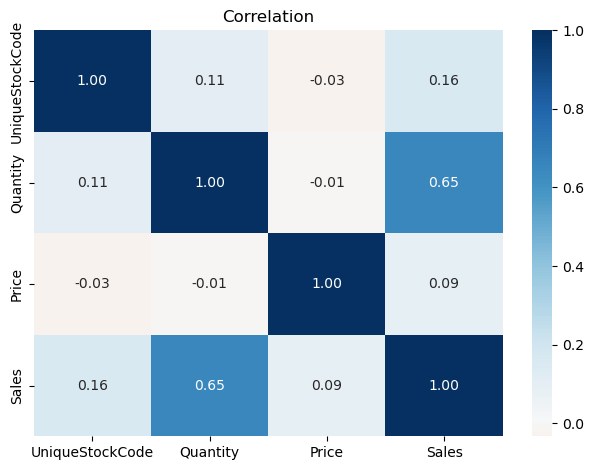

In [1121]:
sns.heatmap(grouped_corr, annot=True, cmap='RdBu', fmt=".2f", center=0)

plt.title('Correlation')
plt.tight_layout()

plt.savefig("../Images/Correlation.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/Correlation.svg", dpi=300, bbox_inches="tight")  # Save as SVG

plt.show()

## RFM - Recency, Frequency, Monetary
Recency
* Median of 96 days, Average of 201 days
* skewed right

Frequency
* Median of 3 purchases, Average of 6 purchases
* strongly skewed right

Monetary
* Median Sales of 867.74, Average Sales of 2955.90
* strongly skewed right

Relationships
* -0.26 correlation between Recency and Frequency could indicate that some customers who buy more frequently tend to have purchased recently. But the weak correlation makes it not generalizable.
* 0.63 correlation between Monetary and Frequency indicates that more often they buy the more they spend.  Moderately strong so generaliable but not fully generalizable.

In [929]:
# Set reference date for frequency to one day after max date
max_date = has_id['InvoiceDate'].max()
reference_date = max_date + pd.Timedelta(days=1)
print(f"Max Date: {max_date}, Reference Date: {reference_date}")

Max Date: 2011-12-09 12:50:00, Reference Date: 2011-12-10 12:50:00


In [930]:
rfm = has_id.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                    # Frequency
    'Sales': 'sum'                                        # Monetary
}).reset_index()
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)


In [1135]:
rfm.describe([.25,.5,.75,.95,.99])

,Recency,Frequency,Monetary
count,5878.0,5878.0,5878.0
mean,201.331915617557,6.289384144266758,2955.904052734375
std,209.33870672957246,13.009405882310057,14440.83984375
min,1.0,1.0,2.950000047683716
25%,26.0,1.0,342.27999114990234
50%,96.0,3.0,867.739990234375
75%,380.0,7.0,2248.3049926757812
95%,625.0,21.0,9374.227001953119
99%,726.0,46.0,29205.901367187143
max,739.0,398.0,580987.0625


#### Recency

In [1149]:
has_id.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

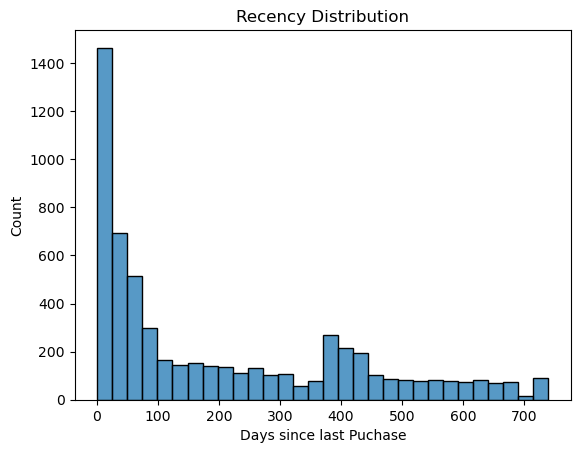

In [1147]:
sns.histplot(rfm.Recency, bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days since last Puchase')

plt.savefig("../Images/recency.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/recency.svg", dpi=300, bbox_inches="tight")  # Save as SVG


plt.show()

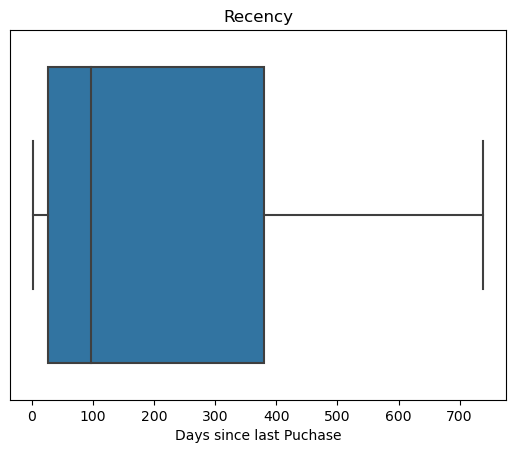

In [934]:
sns.boxplot(rfm.Recency, orient='h')
plt.yticks([])
plt.title('Recency')
plt.xlabel('Days since last Puchase')
plt.show()

#### Frequency

In [1163]:
rfm.Frequency.describe([.25,.5,.75,.95,.99])

count               5878.0
mean     6.289384144266758
std     13.009405882310057
min                    1.0
25%                    1.0
50%                    3.0
75%                    7.0
95%                   21.0
99%                   46.0
max                  398.0
Name: Frequency, dtype: float64

In [1183]:
##### Percent less then 10 purchases #####
# len(rfm[rfm.Frequency<=10]) # 5002
len(rfm[rfm.Frequency<=10])/len(rfm)*100

85.09697175910173

In [1179]:
##### Percent only 1 purchase #####
len(rfm[rfm.Frequency==1])/len(rfm)*100

27.611432460020414

In [1187]:
##### top 1% purchases #####
len(rfm[rfm.Frequency>46]) # 58
# len(rfm[rfm.Frequency>46])/len(rfm)*100

58

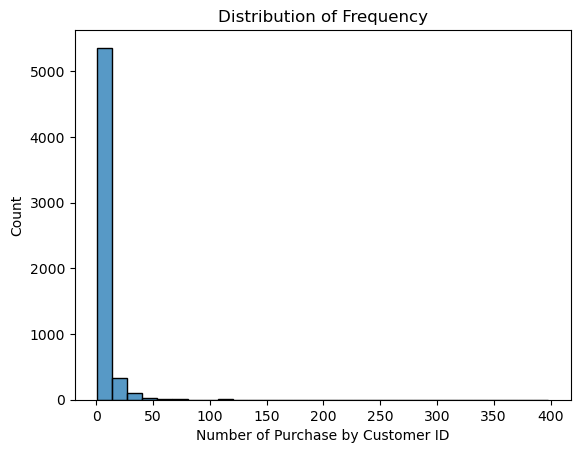

In [1125]:
sns.histplot(rfm.Frequency, bins=30)
plt.title('Distribution of Frequency')
plt.xlabel('Number of Purchase by Customer ID')
plt.show()

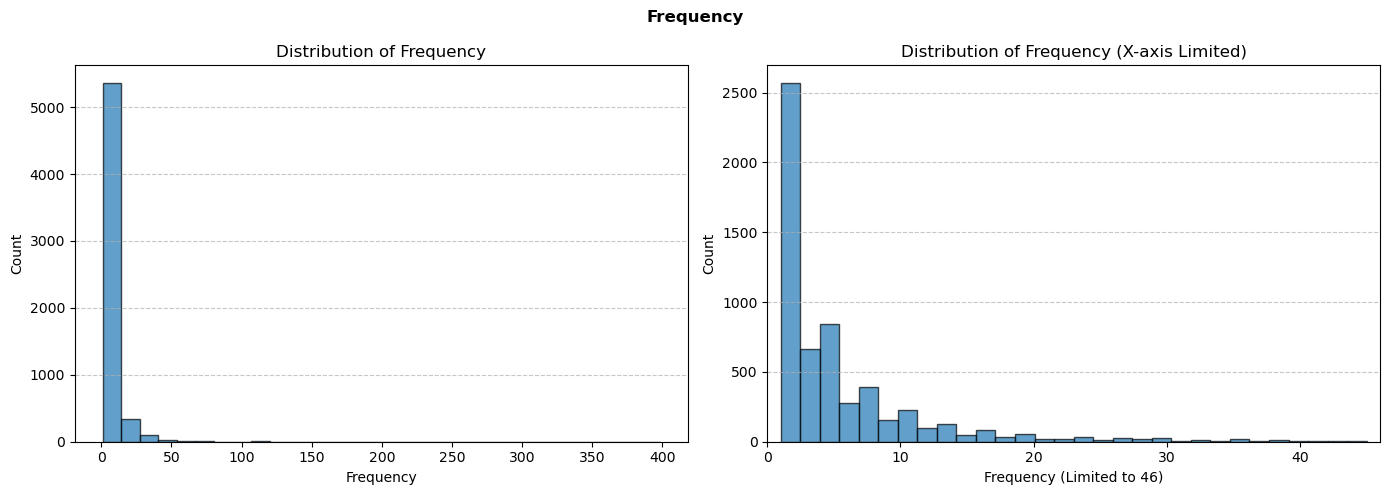

In [1143]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Standard histogram
axes[0].hist(rfm['Frequency'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: Histogram with x-axis limited to 140
axes[1].hist(rfm[rfm['Frequency']<46]['Frequency'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Frequency (Limited to 46)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Frequency (X-axis Limited)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlim(0, 46)  # Limit x-axis


# Add a figure title
fig.suptitle('Frequency', fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title


plt.savefig("../Images/Frequency.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/Frequency.svg", dpi=300, bbox_inches="tight")  # Save as SVG

# Adjust layout and display
plt.tight_layout()
plt.show()

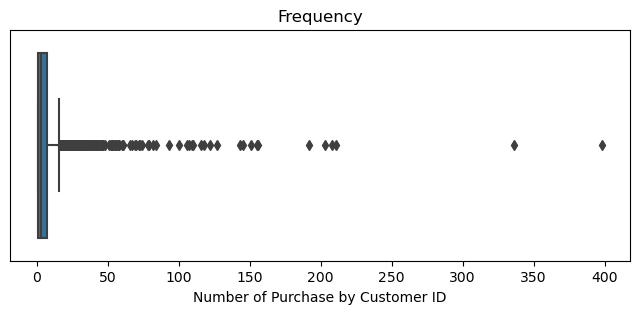

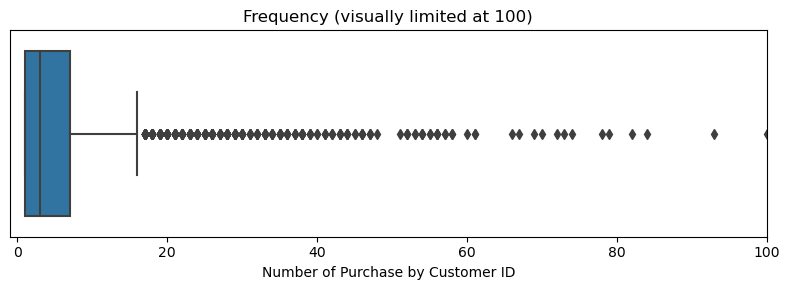

In [937]:
plt.figure(figsize=(8,3))
sns.boxplot(rfm.Frequency, orient='h')
plt.yticks([])
plt.title('Frequency')
plt.xlabel('Number of Purchase by Customer ID')

plt.figure(figsize=(8,3))
sns.boxplot(rfm.Frequency, orient='h')
plt.yticks([])
plt.xlim([-1,100])
plt.title('Frequency (visually limited at 100)')
plt.xlabel('Number of Purchase by Customer ID')
plt.tight_layout()
plt.show()

#### Monetary

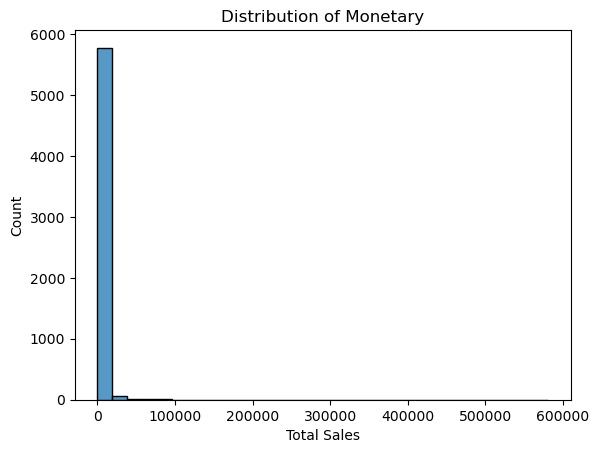

In [1129]:
sns.histplot(rfm.Monetary, bins=30)
plt.title('Distribution of Monetary')
plt.xlabel('Total Sales')
plt.show()

In [1195]:
rfm.Monetary.describe([.25,.5,.75,.95,.955])

count               5878.0
mean     2955.904052734375
std         14440.83984375
min      2.950000047683716
25%     342.27999114990234
50%       867.739990234375
75%     2248.3049926757812
95%      9374.227001953119
95.5%    9959.832646484374
max            580987.0625
Name: Monetary, dtype: float64

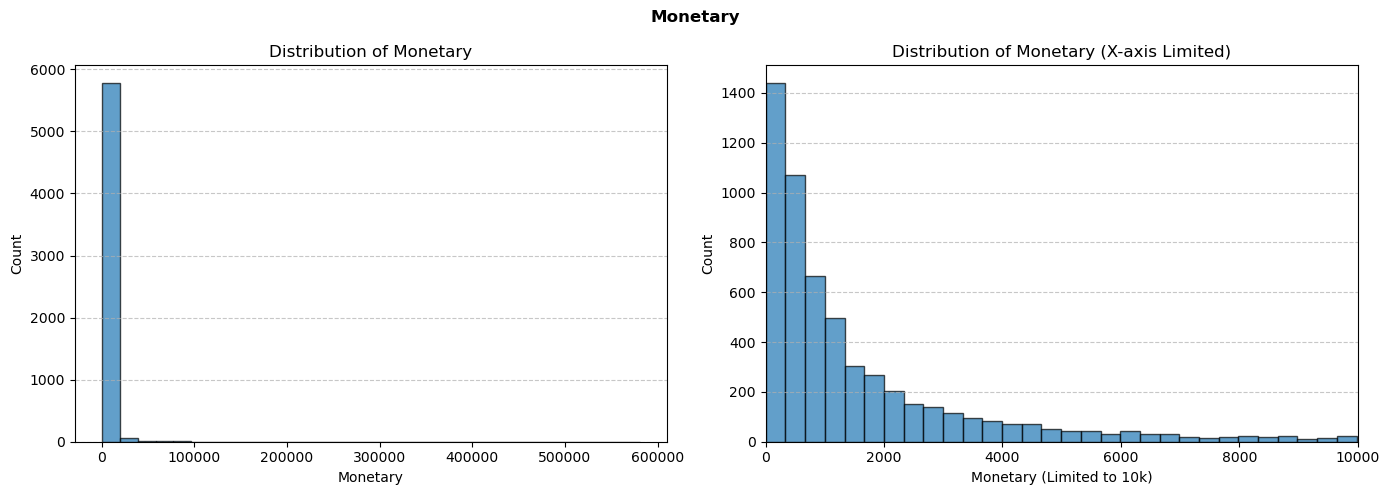

In [1199]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Standard histogram
axes[0].hist(rfm['Monetary'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Monetary')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Monetary')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: Histogram with x-axis limited to 140
axes[1].hist(rfm[rfm['Monetary']<10000]['Monetary'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Monetary (Limited to 10k)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Monetary (X-axis Limited)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlim(0, 10000)  # Limit x-axis


# Add a figure title
fig.suptitle('Monetary', fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title


plt.savefig("../Images/Monetary.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/Monetary.svg", dpi=300, bbox_inches="tight")  # Save as SVG

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1221]:
# len(rfm[rfm.Monetary>=10000]) #261
# len(rfm[rfm.Monetary<=1000])/len(rfm)*100  #3173 / 53.98%
# 
len(rfm[rfm.Monetary>=20000]) #99

99

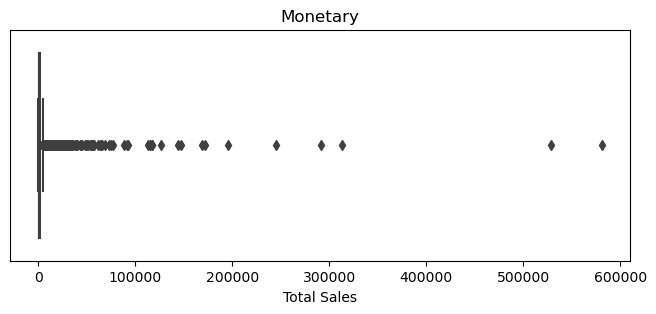

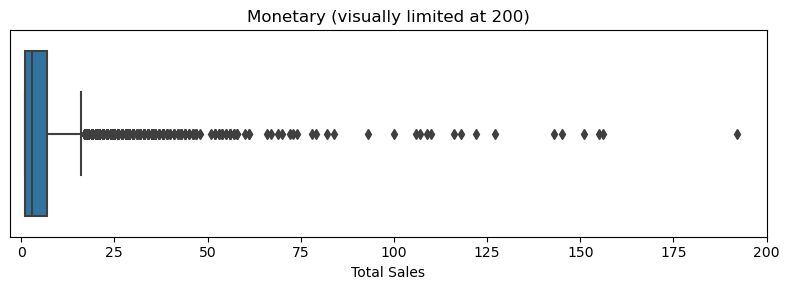

In [940]:
plt.figure(figsize=(8,3))
sns.boxplot(rfm.Monetary, orient='h')
plt.yticks([])
plt.title('Monetary')
plt.xlabel('Total Sales')

plt.figure(figsize=(8,3))
sns.boxplot(rfm.Frequency, orient='h')
plt.yticks([])
plt.xlim([-3,200])
plt.title('Monetary (visually limited at 200)')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

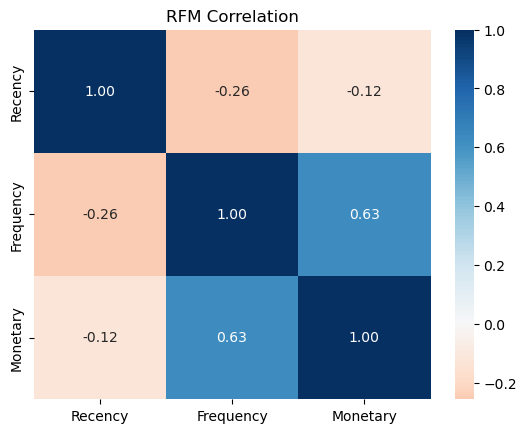

In [1293]:
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']] .corr(), annot=True, cmap='RdBu', fmt=".2f", center=0)
plt.title('RFM Correlation')
plt.savefig("../Images/rfm_correlation.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/rfm_correlation.svg", dpi=300, bbox_inches="tight")  # Save as SVG
plt.show()

In [1235]:
# len(rfm[(rfm.Frequency>rfm.Frequency.median())&(rfm.Monetary>rfm.Monetary.median())])/len(rfm) # 39.89%
len(rfm[(rfm.Frequency>rfm.Frequency.quantile(.75))&(rfm.Monetary>rfm.Monetary.quantile(.75))&(rfm.Recency<rfm.Recency.quantile(.25))])/len(rfm) # median 29.81%  top25 10.54%

/Users/ness/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.10547805375978224

In [1245]:
# rfm[(rfm.Frequency>rfm.Frequency.median())&(rfm.Monetary>rfm.Monetary.median())].describe()
# rfm[(rfm.Frequency>rfm.Frequency.quantile(.75))&(rfm.Monetary>rfm.Monetary.quantile(.75))&(rfm.Recency<rfm.Recency.quantile(.25))].describe()
rfm[~((rfm.Frequency>rfm.Frequency.quantile(.75))&(rfm.Monetary>rfm.Monetary.quantile(.75))&(rfm.Recency<rfm.Recency.quantile(.25)))].describe()

,Recency,Frequency,Monetary
count,5258.0,5258.0,5258.0
mean,223.907379231647,4.037847090148345,1549.92529296875
std,210.12425189693258,4.957561353788496,4124.611328125
min,1.0,1.0,2.950000047683716
25%,40.0,1.0,311.70999908447266
50%,141.0,3.0,723.5249938964844
75%,394.0,5.0,1616.9599914550781
max,739.0,155.0,168472.5


/Users/ness/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


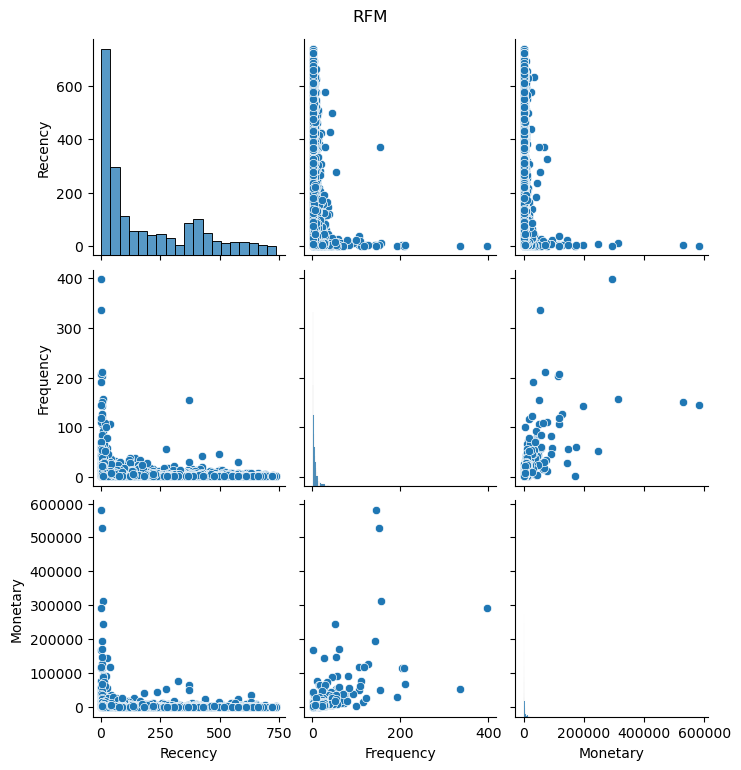

In [1291]:
g = sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']])
plt.suptitle('RFM', y=1.02)
plt.savefig("../Images/rfm_pairplot.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("../Images/rfm_pairplot.svg", dpi=300, bbox_inches="tight")  # Save as SVG
plt.show()

## Export data for future use

In [944]:
# save has_id for known customers after dropping YearMonth
export_path_1 = '../Data/has_id.csv'
has_id.to_csv(export_path_1, index=False)

#save frm
export_path_2 = '../Data/rfm.csv'
rfm.to_csv(export_path_2, index=False)

In [945]:
has_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1041668
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  string        
 1   StockCode    779425 non-null  string        
 2   Description  779425 non-null  string        
 3   Quantity     779425 non-null  int32         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float32       
 6   Customer ID  779425 non-null  string        
 7   Country      779425 non-null  string        
 8   Sales        779425 non-null  float32       
 9   YearMonth    779425 non-null  period[M]     
dtypes: datetime64[ns](1), float32(2), int32(1), period[M](1), string(5)
memory usage: 56.5 MB


In [946]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5878 non-null   string 
 1   Recency      5878 non-null   int64  
 2   Frequency    5878 non-null   int64  
 3   Monetary     5878 non-null   float32
dtypes: float32(1), int64(2), string(1)
memory usage: 160.9 KB
